In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import pandas as pd

In [63]:
# 한글 글꼴체 변경
plt.rcParams['font.family'] ='Malgun Gothic'
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

## 4월, 5월을 기반으로 데이터 불균형 처리 진행
## 11월을 test로 진행

In [6]:
df = pd.read_csv("data/full_data/TPS_cancel_data_preprocessing_end.csv")

p_mt(월)를 보기 편하게 월로만 표시

In [7]:
df['p_mt'] = df['p_mt'] - 202300

In [9]:
df

,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
0,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,2,12개월~24개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 12개월이상,20240325,733,Y,Y,N,3.00,3개월내없음,N,N,60대,수신,수신,0.00,기타,0.00,N,N,N,0.00
1,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,3,24개월~ 36개월미만,HD,이코노미,N,Y,신규,Y,0건,0건,I/B,0.00,약정만료전 9~12개월,20240325,764,Y,Y,N,3.00,일주일내,Y,N,60대,수신,수신,6.72,JTBC,0.00,N,N,N,3.33
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,4,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,794,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,기타,0.00,N,N,N,3.71
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,5,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,825,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,기타,0.00,N,N,N,3.57
4,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,6,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,0.00,약정만료전 6~9개월,20240325,855,Y,Y,N,3.00,일주일내,N,N,60대,수신,수신,4.03,기타,0.00,N,N,N,6.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483407,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,8,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2338,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.03,KBS1,0.00,N,N,N,0.01
21483408,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,9,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2368,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.91,기타,1.00,N,N,N,0.00
21483409,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,10,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2399,N,N,N,1.00,2주일전,Y,N,50대,수신,수신,1.97,기타,0.00,N,N,N,0.19
21483410,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,11,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,0.00,약정만료후 12개월이상,20200405,2429,N,N,N,1.00,3개월내없음,N,N,50대,수신,수신,0.00,기타,0.00,N,N,N,0.00


In [10]:
# 4,5월은 train
# 11월은 test

train = df[df['p_mt'].isin([4,5])]
test = df[df['p_mt'] == 11]

In [9]:
test.to_csv("data/train/test.csv", index=False)

In [11]:
train

,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,4,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,794,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,기타,0.00,N,N,N,3.71
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,5,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,825,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,기타,0.00,N,N,N,3.57
13,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,4,12개월~24개월미만,HD,프리미엄,N,N,재약정,N,0건,0건,I/B,30.00,약정만료전 12개월이상,20240616,4188,Y,Y,N,2.00,일주일내,N,N,50대,수신,수신,7.94,기타,0.00,N,N,N,0.12
14,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,5,12개월~24개월미만,HD,프리미엄,N,N,재약정,N,0건,0건,I/B,50.00,약정만료전 12개월이상,20240616,4219,Y,Y,N,2.00,일주일내,N,N,50대,수신,수신,18.21,기타,0.00,N,N,N,0.02
24,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,4,36개월 이상,HD,베이직,N,Y,재약정,N,0건,0건,일반상담,20.00,약정만료전 12개월이상,20250718,2427,Y,N,N,6.00,일주일내,Y,N,60대,수신,수신,1.39,기타,0.00,N,N,N,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483382,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,5,12개월~24개월미만,HD,이코노미,N,N,약정승계,N,0건,0건,일반상담,0.00,약정만료후 12개월이상,20141014,3775,N,N,N,2.00,일주일내,N,N,30대,전체거부,전체거부,0.85,기타,0.00,N,N,N,0.02
21483392,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,4,36개월 이상,UHD,베이직,N,N,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20250614,1338,Y,N,N,2.00,일주일내,N,N,50대,수신,수신,4.54,기타,1.00,N,N,N,0.51
21483393,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,5,36개월 이상,UHD,베이직,N,N,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20250614,1369,Y,N,N,2.00,일주일내,N,N,50대,수신,수신,5.79,기타,0.00,N,N,N,0.40
21483403,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,4,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2215,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.42,KBS2,0.00,N,N,N,0.00


In [13]:
# 비율 확인
# 전체 데이터와 비율은 비슷해 보인다
display(train['churn'].value_counts(normalize=True) * 100)
display(train['churn'].value_counts())

churn
N   99.32
Y    0.68
Name: proportion, dtype: float64

churn
N    3888294
Y      26547
Name: count, dtype: int64

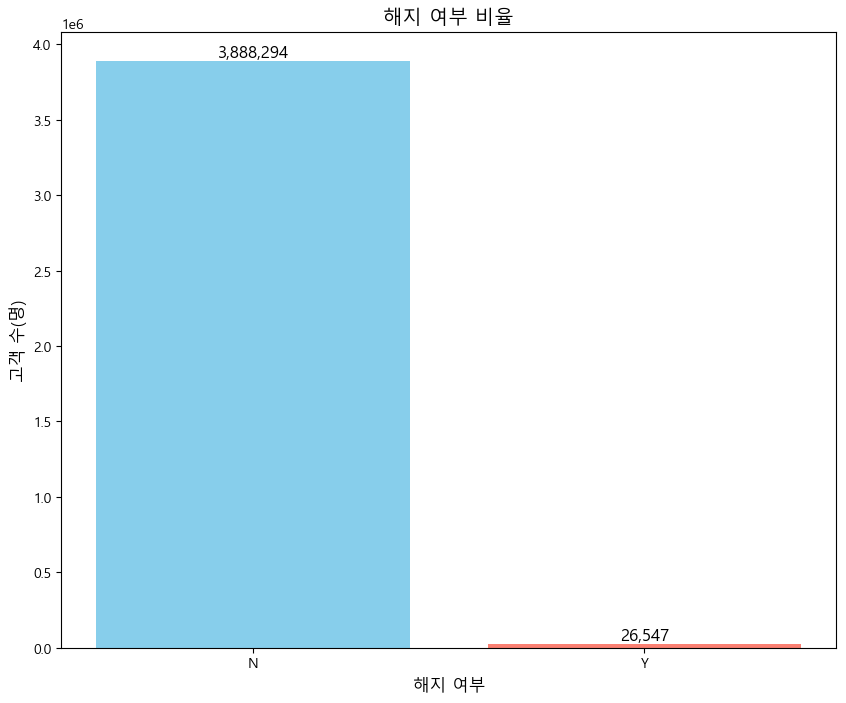

In [14]:
churn_counts = train['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

# 그래프 위에 숫자 표시해주는 코드
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

# 제목, 라벨 추가
plt.xlabel('해지 여부', fontsize=12)
plt.ylabel('고객 수(명)', fontsize=12)
plt.title('해지 여부 비율', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


---

### 1. 랜덤 언더 샘플링 (5:5)

In [15]:
train

,sha2_hash,p_mt,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,AGMT_END_YMD,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,churn,CH_25_RATIO_1MONTH
2,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,4,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,794,Y,Y,N,3.00,3주일전,N,N,60대,수신,수신,9.86,기타,0.00,N,N,N,3.71
3,0000113b86db7c509bbe74d609529031b03b7c033dbdfbd8b7fcecbf92bc8600,5,24개월~ 36개월미만,HD,이코노미,N,Y,신규,N,0건,0건,I/B,10.00,약정만료전 9~12개월,20240325,825,Y,Y,N,3.00,4주일전,N,N,60대,수신,수신,5.95,기타,0.00,N,N,N,3.57
13,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,4,12개월~24개월미만,HD,프리미엄,N,N,재약정,N,0건,0건,I/B,30.00,약정만료전 12개월이상,20240616,4188,Y,Y,N,2.00,일주일내,N,N,50대,수신,수신,7.94,기타,0.00,N,N,N,0.12
14,000015c9d6e36eac1e706b7495b536c36a7478897895f05e5b3b7f47a05fba34,5,12개월~24개월미만,HD,프리미엄,N,N,재약정,N,0건,0건,I/B,50.00,약정만료전 12개월이상,20240616,4219,Y,Y,N,2.00,일주일내,N,N,50대,수신,수신,18.21,기타,0.00,N,N,N,0.02
24,0000161608bc85042f2a7b2d51524e01e44da09a2c92ed7136f09c3b90414858,4,36개월 이상,HD,베이직,N,Y,재약정,N,0건,0건,일반상담,20.00,약정만료전 12개월이상,20250718,2427,Y,N,N,6.00,일주일내,Y,N,60대,수신,수신,1.39,기타,0.00,N,N,N,1.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21483382,ffffe9bc336450ed573a845cea2376c7dc913ba9d775e3223931ed33ba2f08f0,5,12개월~24개월미만,HD,이코노미,N,N,약정승계,N,0건,0건,일반상담,0.00,약정만료후 12개월이상,20141014,3775,N,N,N,2.00,일주일내,N,N,30대,전체거부,전체거부,0.85,기타,0.00,N,N,N,0.02
21483392,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,4,36개월 이상,UHD,베이직,N,N,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20250614,1338,Y,N,N,2.00,일주일내,N,N,50대,수신,수신,4.54,기타,1.00,N,N,N,0.51
21483393,ffffeb35773f914285afa493a7b7cf236063af847c72f39cab28d078edfc74df,5,36개월 이상,UHD,베이직,N,N,재약정,N,0건,0건,I/B,20.00,약정만료전 12개월이상,20250614,1369,Y,N,N,2.00,일주일내,N,N,50대,수신,수신,5.79,기타,0.00,N,N,N,0.40
21483403,fffffa7eda8144ce27e65690933ae8994e6962fefd24c982990467add99d61a7,4,36개월 이상,HD,베이직,N,N,신규,N,0건,0건,현장경로,10.00,약정만료후 12개월이상,20200405,2215,N,N,N,1.00,일주일내,N,N,50대,수신,수신,2.42,KBS2,0.00,N,N,N,0.00


In [16]:
train = train.drop(columns = ['sha2_hash','AGMT_END_YMD','p_mt'])

In [17]:
# 랜덤 시드 42로 설정하고 랜덤 언더 샘플링 진행
from imblearn.under_sampling import RandomUnderSampler

X = train.drop(columns = ['churn'])
y = train['churn']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [26]:
# 원본 데이터 churn 분포!
print("랜덤 언더 샘플링 전:")
print(y.value_counts())

# 랜덤 언더 샘플링 후, churn 분포!
print("\n랜덤 언더 샘플링 후:")
print(pd.Series(y_resampled).value_counts())

랜덤 언더 샘플링 전:
churn
N    3888294
Y      26547
Name: count, dtype: int64

랜덤 언더 샘플링 후:
churn
N    26547
Y    26547
Name: count, dtype: int64


In [22]:
display(X_resampled, y_resampled)
display(type(X_resampled), type(y_resampled))

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH
11693518,36개월 이상,HD,이코노미,N,Y,재약정,N,0건,0건,현장경로,10.00,약정만료전 12개월이상,2498,Y,N,N,6.00,일주일내,N,N,60대,수신,수신,1.49,기타,0.00,N,N,7.49
5269361,36개월 이상,HD,이코노미,N,Y,신규,N,0건,0건,현장경로,0.00,약정만료후 1개월~2개월,1127,N,N,N,2.00,일주일내,N,N,60대,전체거부,전체거부,2.18,기타,0.00,N,N,0.39
7479767,36개월 이상,HD,베이직,N,N,약정승계,N,0건,0건,일반상담,60.00,약정만료후 12개월이상,4521,N,N,N,1.00,일주일내,N,N,40대,전체거부,수신,9.94,KBS2,0.00,N,N,0.79
16904551,36개월 이상,HD,프리미엄,N,N,약정승계,N,0건,0건,현장경로,40.00,약정만료후 12개월이상,2519,Y,N,N,2.00,일주일내,N,N,60대,전체거부,수신,9.11,기타,0.00,N,N,1.90
13994486,36개월 이상,HD,이코노미,N,N,재약정,N,0건,0건,직영몰,40.00,약정만료전 12개월이상,1684,Y,N,N,3.00,일주일내,Y,N,40대,수신,수신,9.60,TV조선,0.00,N,N,4.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21474952,36개월 이상,HD,베이직,N,N,약정승계,Y,0건,0건,I/B,0.00,약정만료후 12개월이상,2746,N,N,N,1.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,기타,0.00,N,N,0.00
21477897,36개월 이상,HD,베이직,N,N,약정승계,N,0건,0건,O/B,40.00,약정만료후 12개월이상,2428,N,N,N,2.00,일주일내,N,N,60대,전체거부,수신,6.07,기타,0.00,N,N,2.32
21481551,36개월 이상,HD,프리미엄,N,Y,재약정,N,0건,0건,I/B,0.00,약정만료전 12개월이상,3943,Y,N,N,4.00,3개월내없음,Y,N,70대,수신,수신,0.00,기타,0.00,N,N,0.00
21481753,36개월 이상,HD,프리미엄,N,N,약정승계,Y,0건,0건,O/B,0.00,약정만료후 12개월이상,3198,Y,N,N,3.00,3개월내없음,N,N,80대,수신,수신,0.00,기타,0.00,N,N,0.00


11693518    N
5269361     N
7479767     N
16904551    N
13994486    N
           ..
21474952    Y
21477897    Y
21481551    Y
21481753    Y
21482939    Y
Name: churn, Length: 53094, dtype: object

pandas.core.frame.DataFrame

pandas.core.series.Series

In [23]:
# y_resampled의 이름을 churn으로 명확하게 설정
y_resampled = pd.Series(y_resampled, name='churn')

# 그리고 X_resampled와 y_resampled 병합
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

랜덤 언더 샘플링 결과 확인

In [24]:
display(resampled_data)

,SVC_USE_DAYS_GRP,MEDIA_NM_GRP,PROD_NM_GRP,PROD_OLD_YN,PROD_ONE_PLUS_YN,AGMT_KIND_NM,STB_RES_1M_YN,SVOD_SCRB_CNT_GRP,PAID_CHNL_CNT_GRP,SCRB_PATH_NM_GRP,INHOME_RATE,AGMT_END_SEG,TOTAL_USED_DAYS,BUNDLE_YN,DIGITAL_GIGA_YN,DIGITAL_ALOG_YN,TV_I_CNT,CH_LAST_DAYS_BF_GRP,VOC_TOTAL_MONTH1_YN,VOC_STOP_CANCEL_MONTH1_YN,AGE_GRP10,EMAIL_RECV_CLS_NM,SMS_SEND_CLS_NM,CH_HH_AVG_MONTH1,CH_FAV_RNK1,KIDS_USE_PV_MONTH1,NFX_USE_YN,YTB_USE_YN,CH_25_RATIO_1MONTH,churn
11693518,36개월 이상,HD,이코노미,N,Y,재약정,N,0건,0건,현장경로,10.00,약정만료전 12개월이상,2498,Y,N,N,6.00,일주일내,N,N,60대,수신,수신,1.49,기타,0.00,N,N,7.49,N
5269361,36개월 이상,HD,이코노미,N,Y,신규,N,0건,0건,현장경로,0.00,약정만료후 1개월~2개월,1127,N,N,N,2.00,일주일내,N,N,60대,전체거부,전체거부,2.18,기타,0.00,N,N,0.39,N
7479767,36개월 이상,HD,베이직,N,N,약정승계,N,0건,0건,일반상담,60.00,약정만료후 12개월이상,4521,N,N,N,1.00,일주일내,N,N,40대,전체거부,수신,9.94,KBS2,0.00,N,N,0.79,N
16904551,36개월 이상,HD,프리미엄,N,N,약정승계,N,0건,0건,현장경로,40.00,약정만료후 12개월이상,2519,Y,N,N,2.00,일주일내,N,N,60대,전체거부,수신,9.11,기타,0.00,N,N,1.90,N
13994486,36개월 이상,HD,이코노미,N,N,재약정,N,0건,0건,직영몰,40.00,약정만료전 12개월이상,1684,Y,N,N,3.00,일주일내,Y,N,40대,수신,수신,9.60,TV조선,0.00,N,N,4.12,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21474952,36개월 이상,HD,베이직,N,N,약정승계,Y,0건,0건,I/B,0.00,약정만료후 12개월이상,2746,N,N,N,1.00,3개월내없음,N,N,60대,전체거부,전체거부,0.00,기타,0.00,N,N,0.00,Y
21477897,36개월 이상,HD,베이직,N,N,약정승계,N,0건,0건,O/B,40.00,약정만료후 12개월이상,2428,N,N,N,2.00,일주일내,N,N,60대,전체거부,수신,6.07,기타,0.00,N,N,2.32,Y
21481551,36개월 이상,HD,프리미엄,N,Y,재약정,N,0건,0건,I/B,0.00,약정만료전 12개월이상,3943,Y,N,N,4.00,3개월내없음,Y,N,70대,수신,수신,0.00,기타,0.00,N,N,0.00,Y
21481753,36개월 이상,HD,프리미엄,N,N,약정승계,Y,0건,0건,O/B,0.00,약정만료후 12개월이상,3198,Y,N,N,3.00,3개월내없음,N,N,80대,수신,수신,0.00,기타,0.00,N,N,0.00,Y


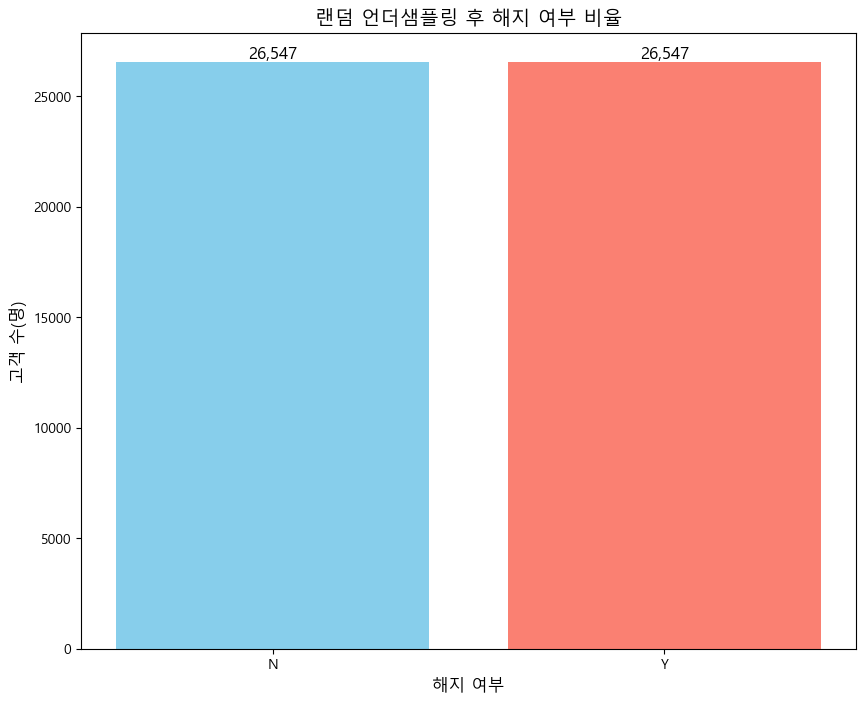

In [27]:
import matplotlib.pyplot as plt

churn_counts = resampled_data['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('해지 여부', fontsize=12)
plt.ylabel('고객 수(명)', fontsize=12)
plt.title('랜덤 언더샘플링 후 해지 여부 비율', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()

In [29]:
# CSV 파일로 저장
resampled_data.to_csv('data/train/train_undersample_4_5.csv', index=False)

---

### 2. SMOTE-NC 샘플링 진행

train -> 4,5월 데이터를 smote_nc 진행 <br><br>
test -> 11월 데이터를 test 진행

`SMOTE_NC`는 연속형과 범주형 변수가 섞여있는 데이터에 사용되는 <B>오버샘플링</B> 기법임. <BR><br>
`SMOTE_NC`는 범주형 변수는 가장 가까운 샘플에서 다수결 방식으로 선택하고, 연속형 변수만 기존 방식처럼 보간하여 생성하기 때문에, 데이터 왜곡을 최소화할 수 있음.

#### 💥 주피터에서는 불가능 -> 코랩 pro에서 진행함.

코랩코드

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import operator
import math
import warnings
import openpyxl
import random
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
import tensorflow as tf
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [ ]:
plt.rc('font', family='NanumBarunGothic', size=11)
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인
# df.head() 이런거 했을 때, 컬럼이 생략되지 않고, 모든 컬럼 뜨게
pd.set_option('display.max_columns', None)
# 지수 표기법 대신에 소수점으로 표시하는코드
pd.options.display.float_format = '{:.2f}'.format
# 값 길이 제한 X
pd.set_option('display.max_colwidth', None) # 값 길이 제한 없음

In [ ]:
# 코랩 내에서 데이터 불러오기
datapath ='/content/drive/MyDrive/Colab Notebooks/data/TPS_cancel_data_preprocessing_end.csv'

In [ ]:
df = pd.read_csv(datapath)

In [ ]:
# 4,5월 train
# 11월 test

train = df[df['p_mt'].isin([4,5])]
test = df[df['p_mt'].isin([11])]

In [ ]:
display(train, test)

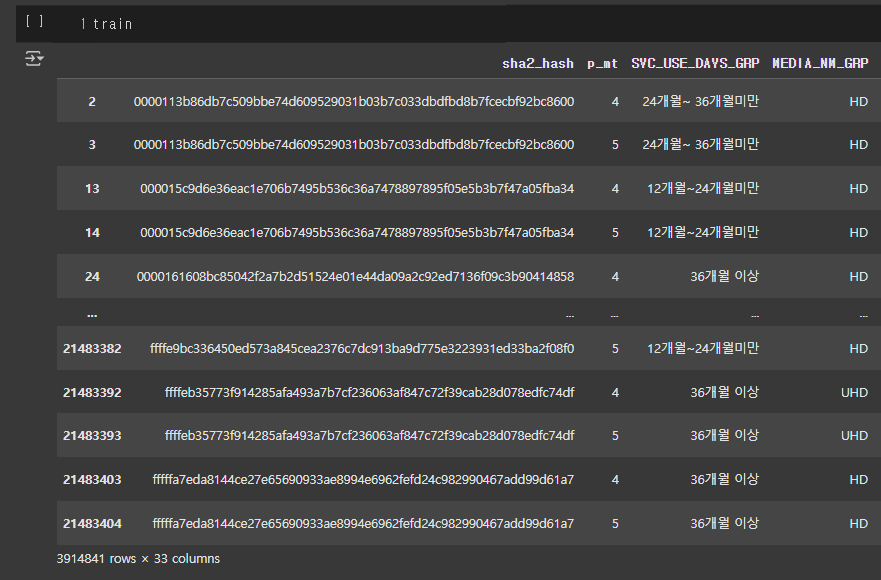

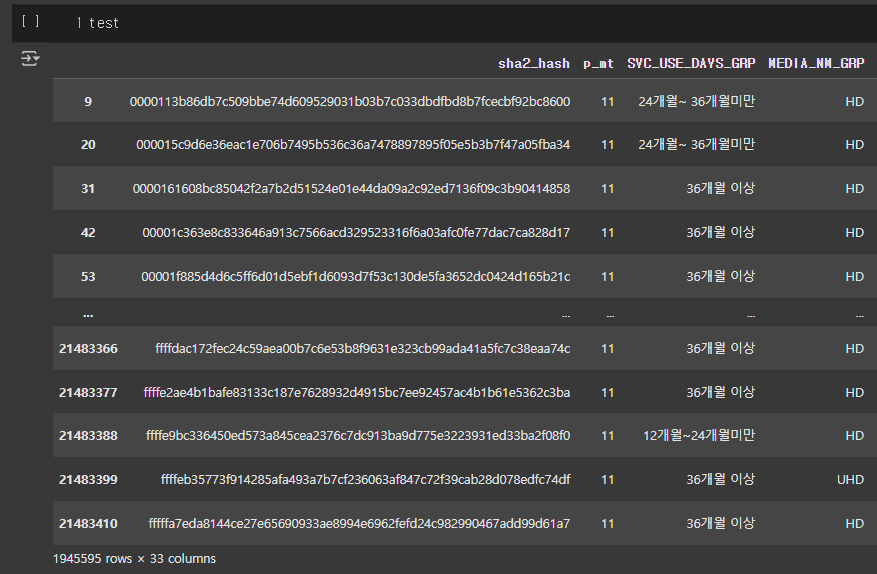

In [ ]:
train = train.drop(columns=['sha2_hash','AGMT_END_YMD','p_mt'])
test = test.drop(columns=['sha2_hash','AGMT_END_YMD','p_mt'])

SMOTE-NC 기법 사용해서 오버샘플링 후, CSV로 저장함.<br><br>
대략 30분동안 진행됨

In [ ]:
# SMOTE-NC로 데이터 불균형 해결

X = train.drop(columns = ['churn'])
y = train['churn']

categorical_cols = X.select_dtypes(include='object').columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

print("범주형 변수의 컬럼:", categorical_cols.tolist())
print("범주형 변수의 인덱스:", categorical_indices)

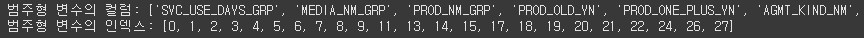

In [ ]:
# SMOTE-NC 객체 생성
smote_nc = SMOTENC(
    categorical_features=categorical_indices,
    random_state=42
)

X_smote, y_smote = smote_nc.fit_resample(X, y)

In [ ]:
print("Before SMOTE-NC:")
print(y.value_counts())

print("\nAfter SMOTE-NC:")
print(pd.Series(y_smote).value_counts())

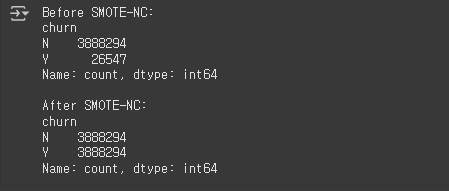

In [ ]:
# 병합하여 최종 데이터 생성
train_smote_nc = pd.concat([X_smote, y_smote], axis=1)

In [ ]:
display(train_smote_nc)

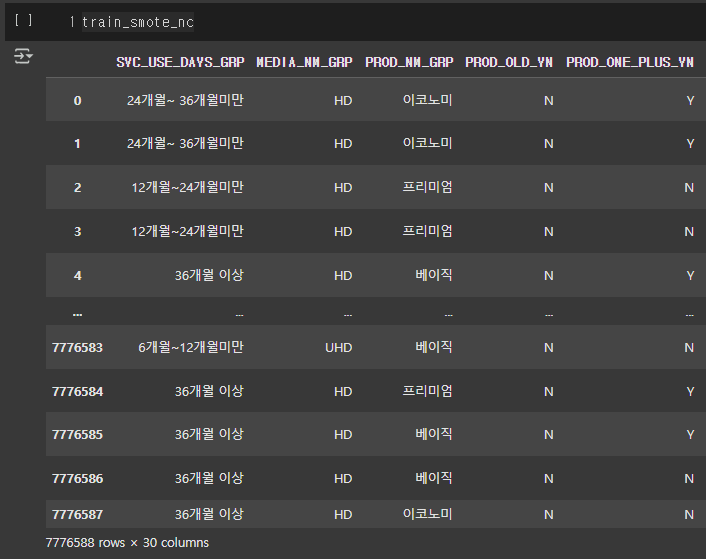

In [ ]:
# CSV로 저장
# 코랩에서 파일 만든 뒤, 필자의 C드라이브 파일로 옮김.

csv_path = "/content/drive/MyDrive/Colab Notebooks/data/train_smoteNC_4_5.csv" 
train_smote_nc.to_csv(csv_path, index=False)

In [ ]:
train_smote_nc[train_smote_nc['churn'] == 'Y']

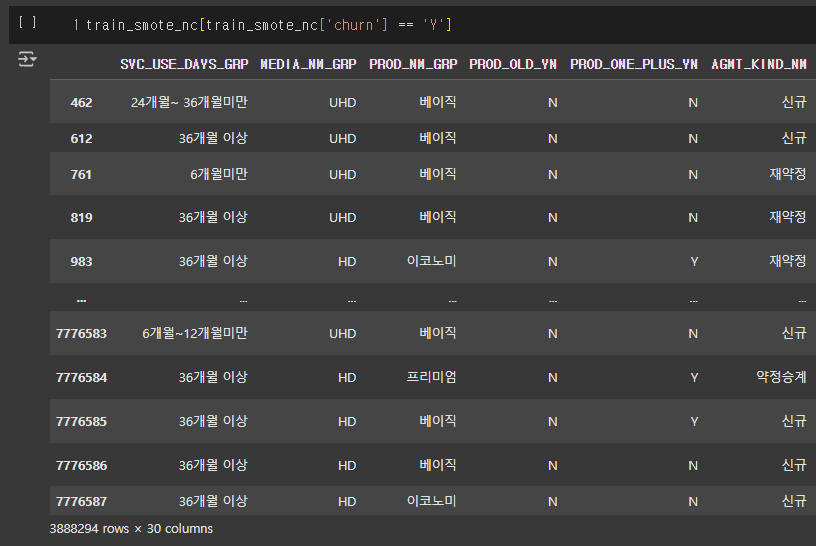

---

### 3. SMOTE-NC + 랜덤 언더 샘플링
6:4 비율로 (실제 상황과 비슷하게 -> (해지 고객이 더 적은 해지 데이터 특성 상))

train -> 4,5월 데이터를 smote_nc 진행 <br>
test -> 11월 데이터를 test 진행

위에서 만들었던 SMOTE-NC 데이터를 6:4 비율로 진행

In [32]:
df_smote = pd.read_csv("data/train_smoteNC_4_5.csv")

In [34]:
df_smote['churn'].value_counts()

churn
N    3888294
Y    3888294
Name: count, dtype: int64

In [35]:
X = df_smote.drop(columns=['churn'])
y = df_smote['churn']

In [39]:
num_N = sum(y == 'N')  # N 개수 유지
target_Y_final = int(num_N * (4 / 6))  # N에 맞춰 Y 개수 설정
display(num_N, target_Y_final)

3888294

2592196

In [40]:
# 언더샘플링 실행 (Y를 6:4 비율에 맞게 줄이기)
under = RandomUnderSampler(
    sampling_strategy={'N': num_N, 'Y': target_Y_final},  # Y를 줄이기
    random_state=42
)

X_resampled, y_resampled = under.fit_resample(X, y)

In [41]:
# 다시 데이터프레임으로 변환
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [42]:
print("✅ 최종 샘플링 완료!")
print("📊 클래스 분포:\n", df_resampled['churn'].value_counts())

✅ 최종 샘플링 완료!
📊 클래스 분포:
 churn
N    3888294
Y    2592196
Name: count, dtype: int64


In [45]:
df_resampled.to_csv("data/train/train_underSmote_4_5.csv", index=False)

---

### 4. 가중치

가중치는 모델 학습시, <b>class_weights = 'balanced'</b>를 적용

---

### 5. 데이터 불균형 처리 확인

In [6]:
df_1 = pd.read_csv("data/train/train_undersample_4_5.csv")
df_2 = pd.read_csv("data/train/train_smoteNC_4_5.csv")
df_3 = pd.read_csv("data/train/train_underSmote_4_5.csv")

In [7]:
# 비율 확인
display(df_1['churn'].value_counts(normalize=True) * 100)
display(df_2['churn'].value_counts(normalize=True) * 100)
display(df_3['churn'].value_counts(normalize=True) * 100)

churn
N   50.00
Y   50.00
Name: proportion, dtype: float64

churn
N   50.00
Y   50.00
Name: proportion, dtype: float64

churn
N   60.00
Y   40.00
Name: proportion, dtype: float64

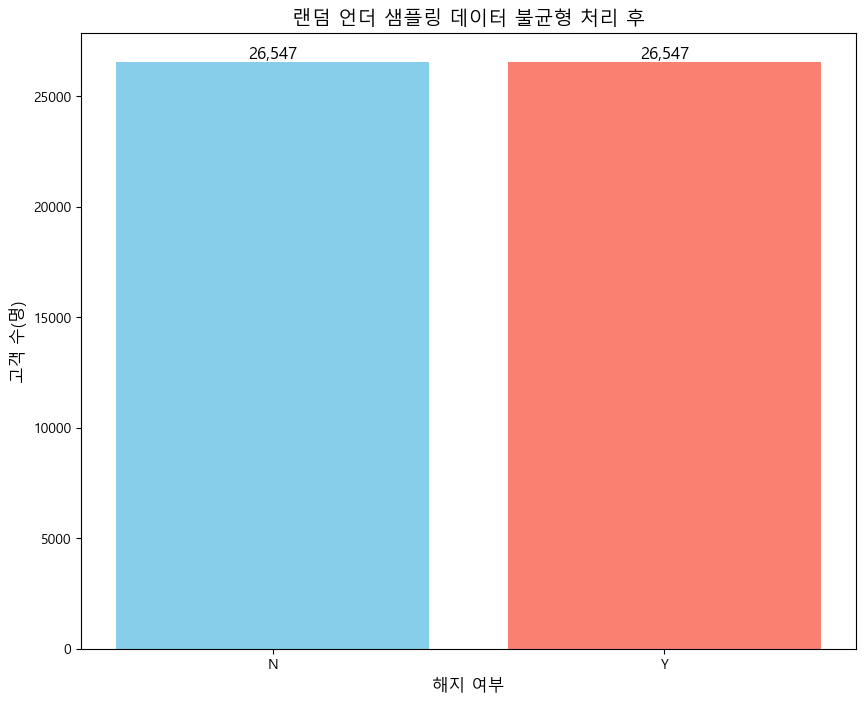

In [13]:
# 랜덤 언더 샘플링
churn_counts = df_1['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)
    
plt.xlabel('해지 여부', fontsize=12)
plt.ylabel('고객 수(명)', fontsize=12)
plt.title('랜덤 언더 샘플링 데이터 불균형 처리 후', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


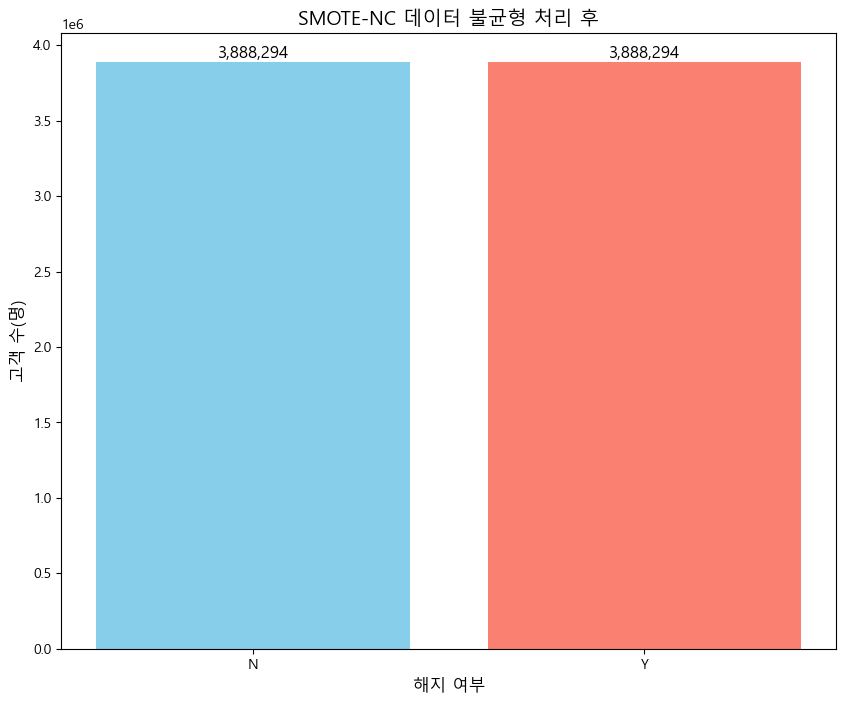

In [12]:
# SMOTE-NC
churn_counts = df_2['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('해지 여부', fontsize=12)
plt.ylabel('고객 수(명)', fontsize=12)
plt.title('SMOTE-NC 데이터 불균형 처리 후', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


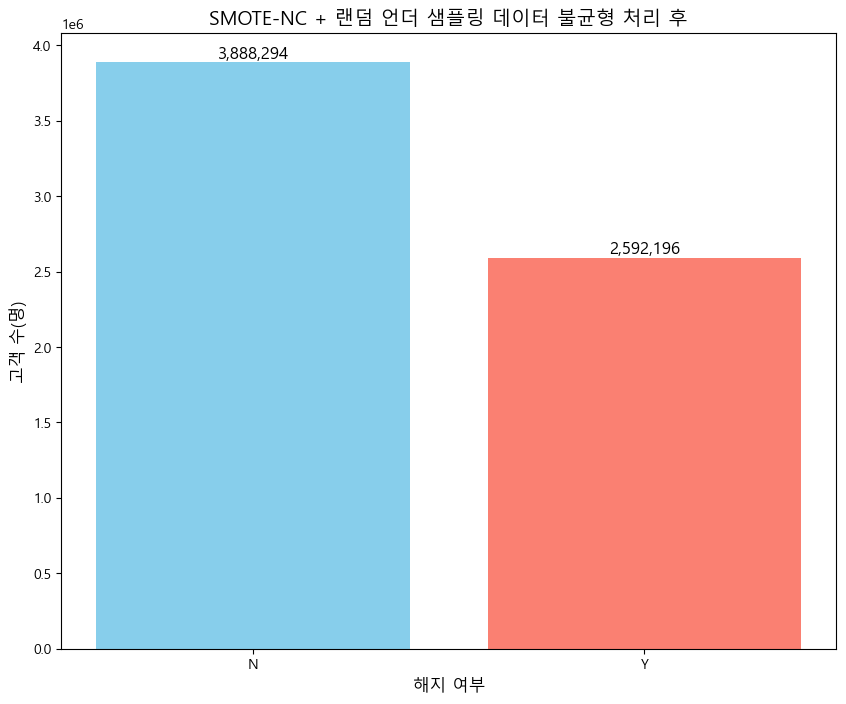

In [11]:
# SMOTE-NC + 랜덤 언더 샘플링
churn_counts = df_3['churn'].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'salmon'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

plt.xlabel('해지 여부', fontsize=12)
plt.ylabel('고객 수(명)', fontsize=12)
plt.title('SMOTE-NC + 랜덤 언더 샘플링 데이터 불균형 처리 후', fontsize=14)
plt.xticks(churn_counts.index, labels=[str(i) for i in churn_counts.index])

plt.show()


SMOTE-NC와 SMOTE-NC + 랜덤 언더 샘플링한거 반올림

In [22]:
# SMOTE-NC
df_2['TV_I_CNT'] = df_2['TV_I_CNT'].round()

In [23]:
# SMOTE-NC + 랜덤 언더 샘플링
df_3['TV_I_CNT'] = df_3['TV_I_CNT'].round()

In [25]:
display(df_2[['TV_I_CNT']], df_3[['TV_I_CNT']])

,TV_I_CNT
0,3.00
1,3.00
2,2.00
3,2.00
4,6.00
...,...
7776583,2.00
7776584,3.00
7776585,4.00
7776586,2.00


,TV_I_CNT
0,6.00
1,2.00
2,1.00
3,2.00
4,3.00
...,...
6480485,2.00
6480486,1.00
6480487,4.00
6480488,1.00


INHOME_RATE 값은 변경 후, object형으로
  - smote-nc 때문에 INHOME_RATE의 값이 68.22 같은 값이 존재하게 됨.

In [26]:
df_1['INHOME_RATE'] = df_1['INHOME_RATE'].astype(str)
df_2['INHOME_RATE'] = df_2['INHOME_RATE'].astype(str)
df_3['INHOME_RATE'] = df_3['INHOME_RATE'].astype(str)

In [28]:
# INHOME_RATE 값 반올림 함수

def round_INHOME(value):
  if value.replace('.', '').isdigit():
    return str(round(float(value) /10) * 10)
  return value

In [29]:
df_2['INHOME_RATE'] = df_2['INHOME_RATE'].apply(round_INHOME)
df_3['INHOME_RATE'] = df_3['INHOME_RATE'].apply(round_INHOME)

In [39]:
display(df_2['INHOME_RATE'].value_counts(), df_3['INHOME_RATE'].value_counts())

INHOME_RATE
0      2965494
10     1354039
20     1125052
30      873313
40      652346
50      433725
60      242869
70       96751
80       28125
90        4854
100         20
Name: count, dtype: int64

INHOME_RATE
0      2332190
10     1137266
20      960402
30      758094
40      570114
50      383826
60      218188
70       89009
80       26617
90        4764
100         20
Name: count, dtype: int64

원래 데이터 폴더에 있는 것들을 삭제하고 해당 파일들을 다시 저장

In [43]:
df_1.to_csv("data/train/train_undersample_4_5.csv", index=False)

In [44]:
df_2.to_csv("data/train/train_smoteNC_4_5.csv", index=False)

In [45]:
df_3.to_csv("data/train/train_underSmote_4_5.csv", index=False)

##### df_1(랜덤 언더 샘플링) 확인

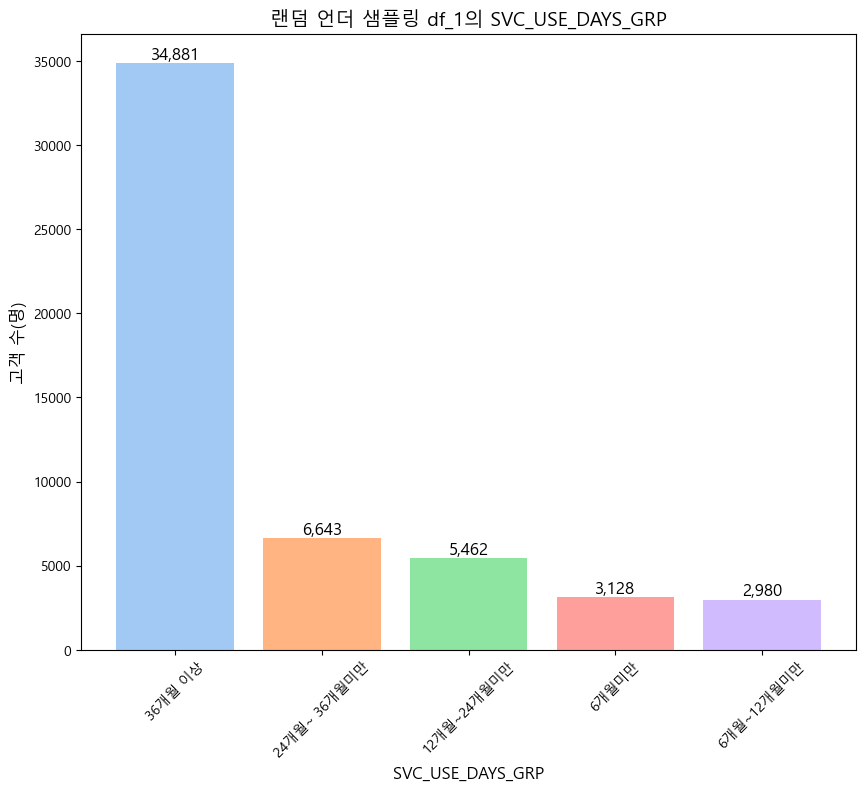

<Figure size 640x480 with 0 Axes>

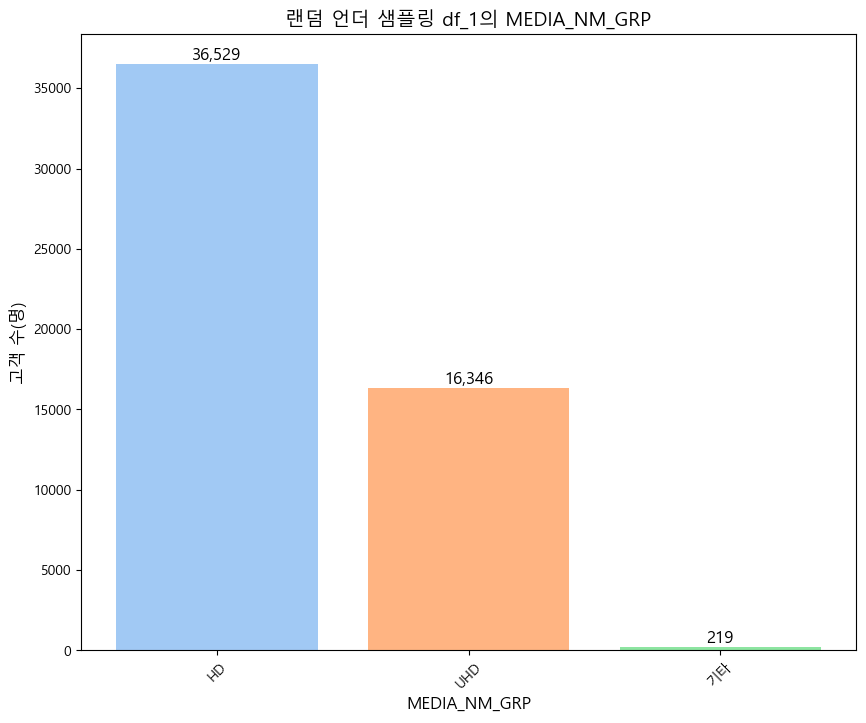

<Figure size 640x480 with 0 Axes>

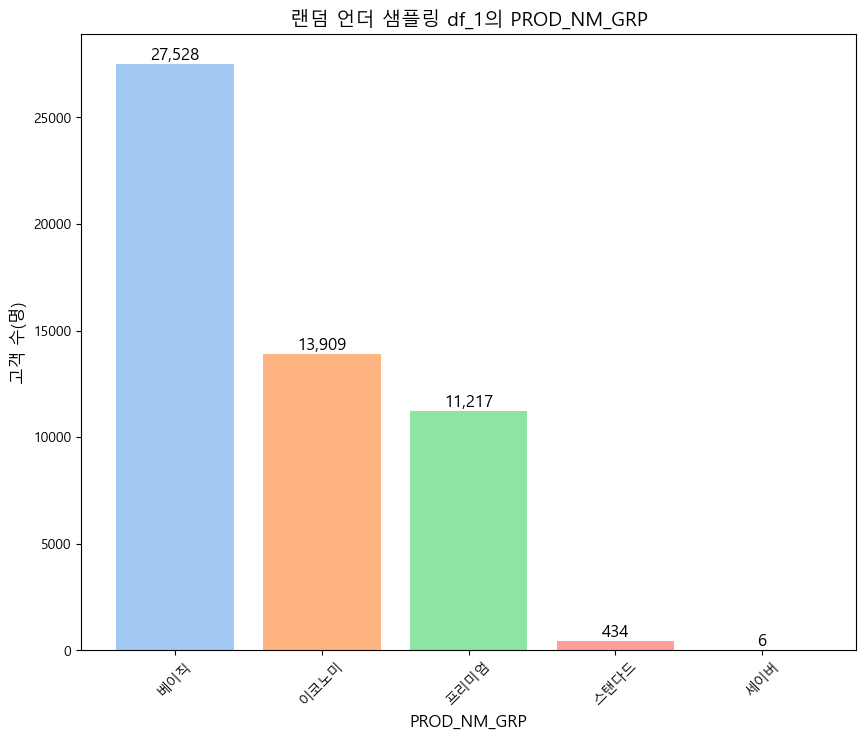

<Figure size 640x480 with 0 Axes>

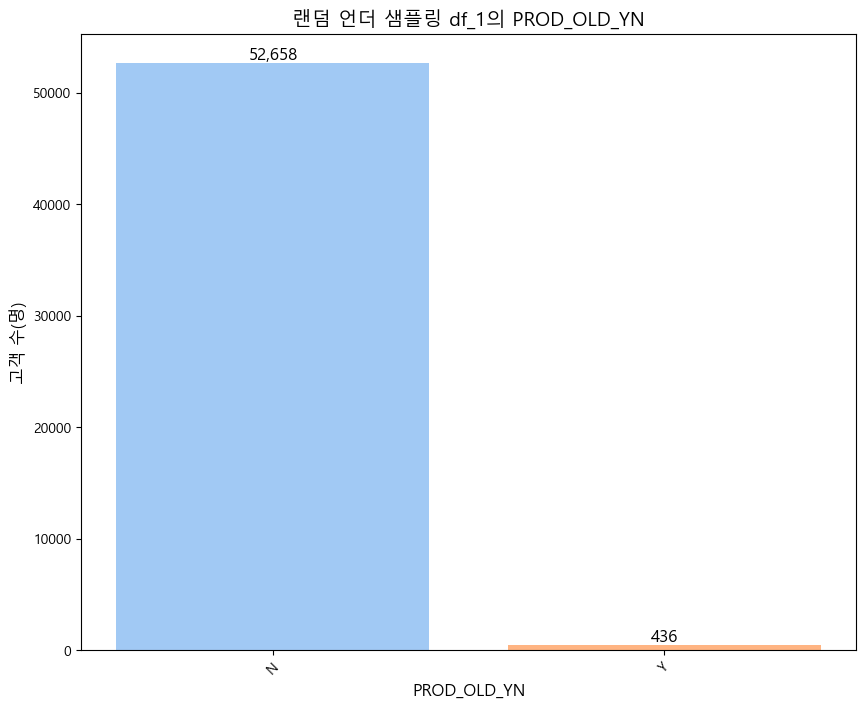

<Figure size 640x480 with 0 Axes>

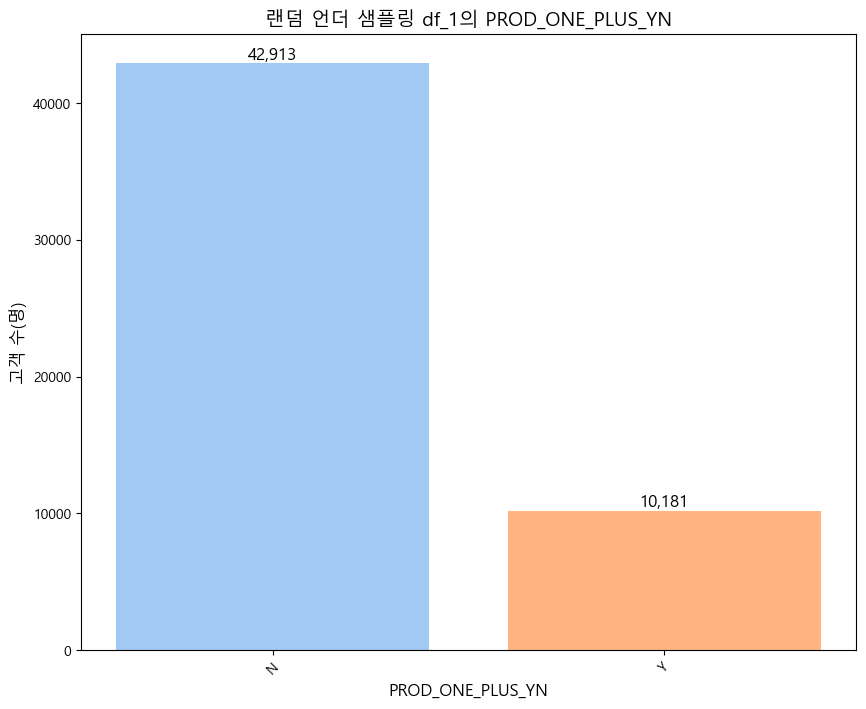

<Figure size 640x480 with 0 Axes>

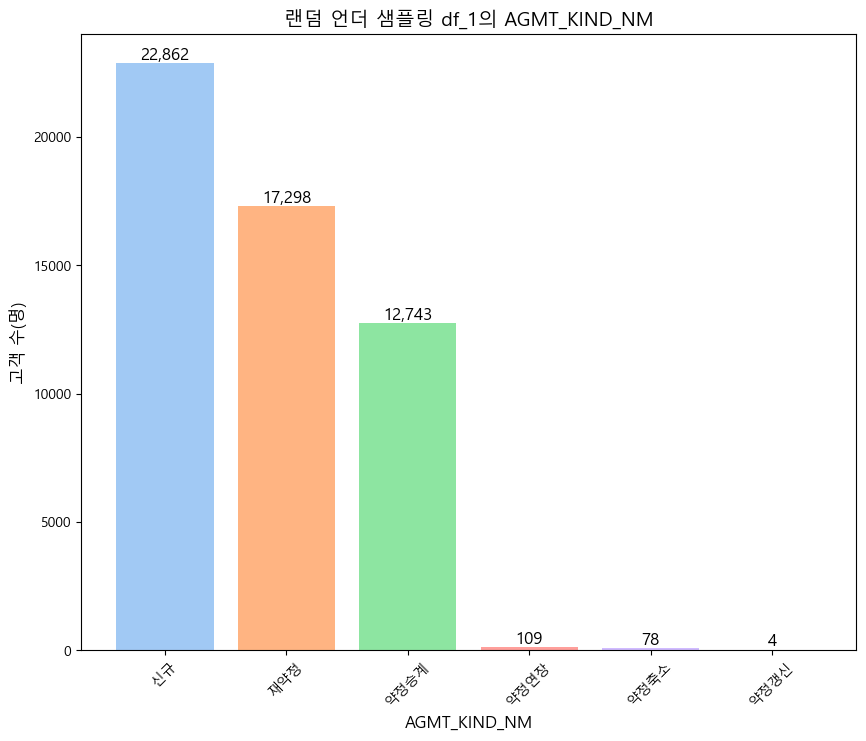

<Figure size 640x480 with 0 Axes>

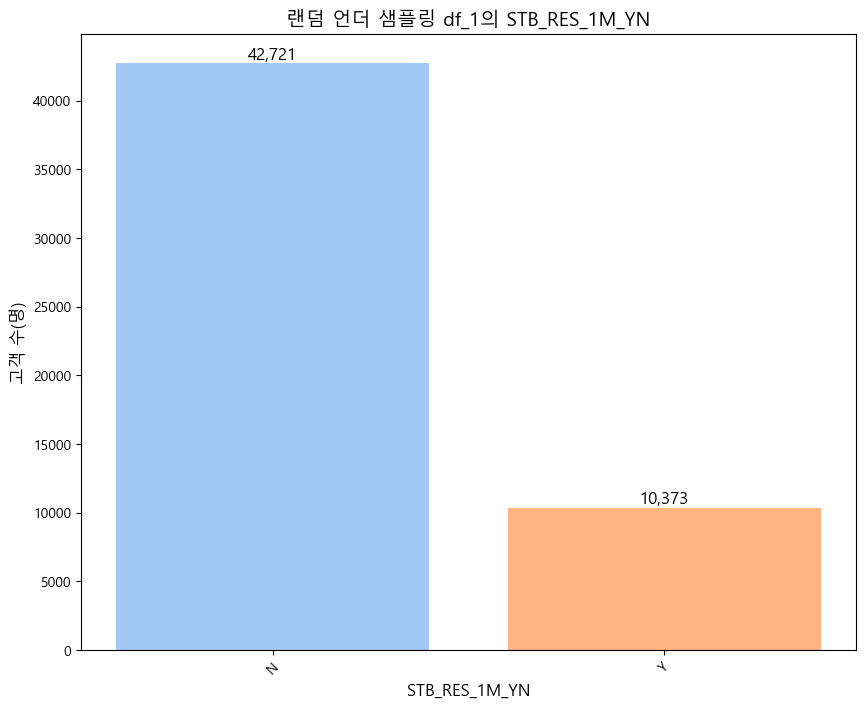

<Figure size 640x480 with 0 Axes>

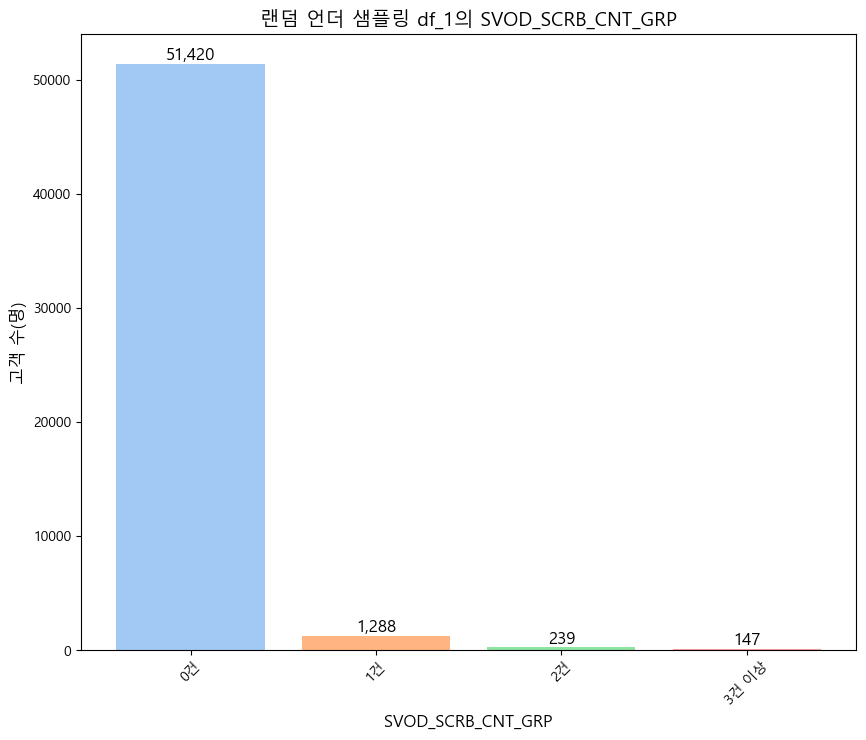

<Figure size 640x480 with 0 Axes>

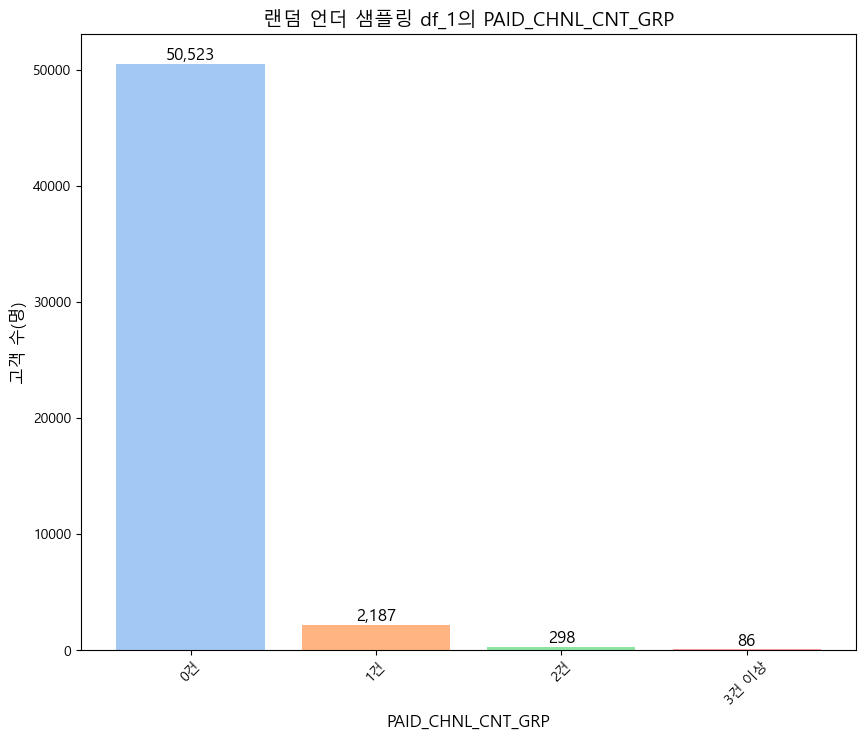

<Figure size 640x480 with 0 Axes>

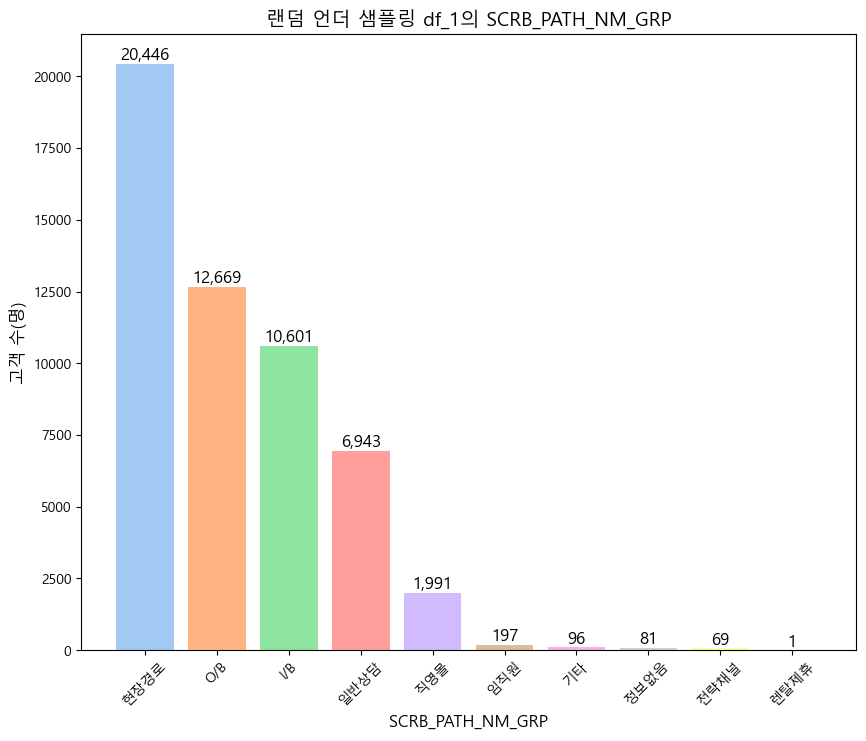

<Figure size 640x480 with 0 Axes>

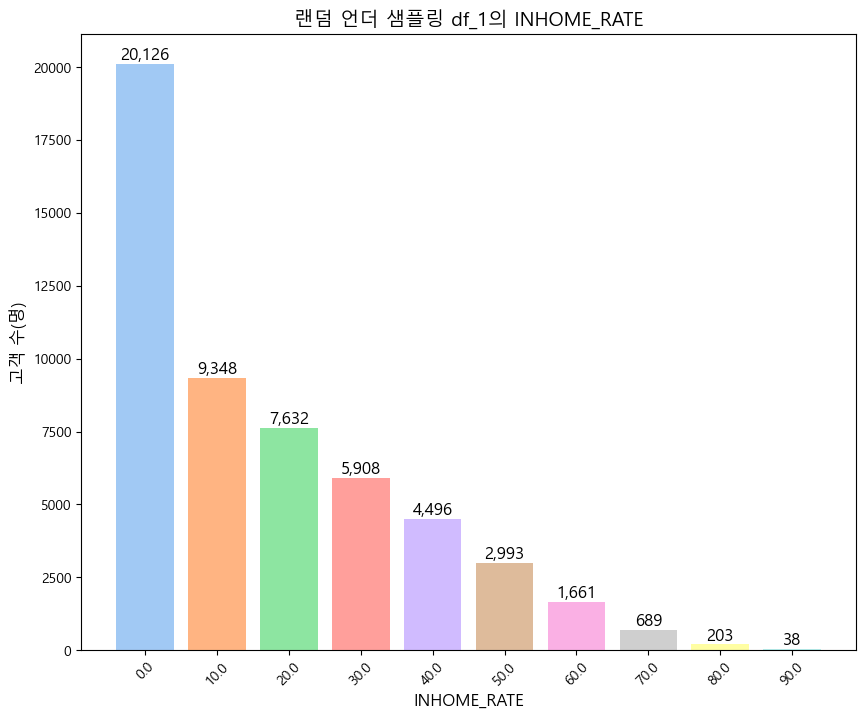

<Figure size 640x480 with 0 Axes>

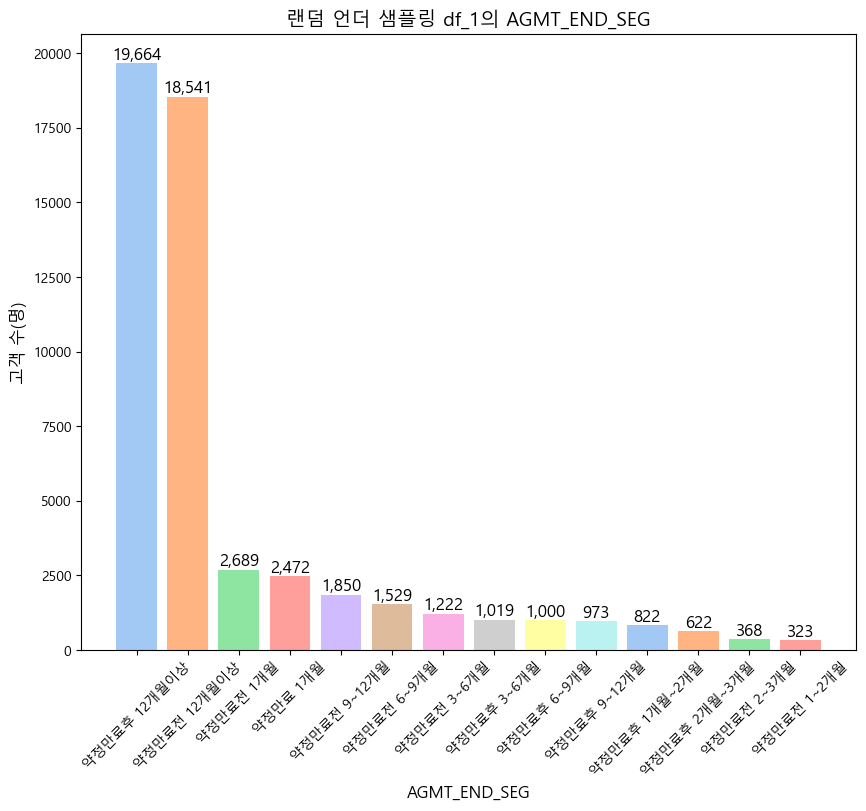

<Figure size 640x480 with 0 Axes>

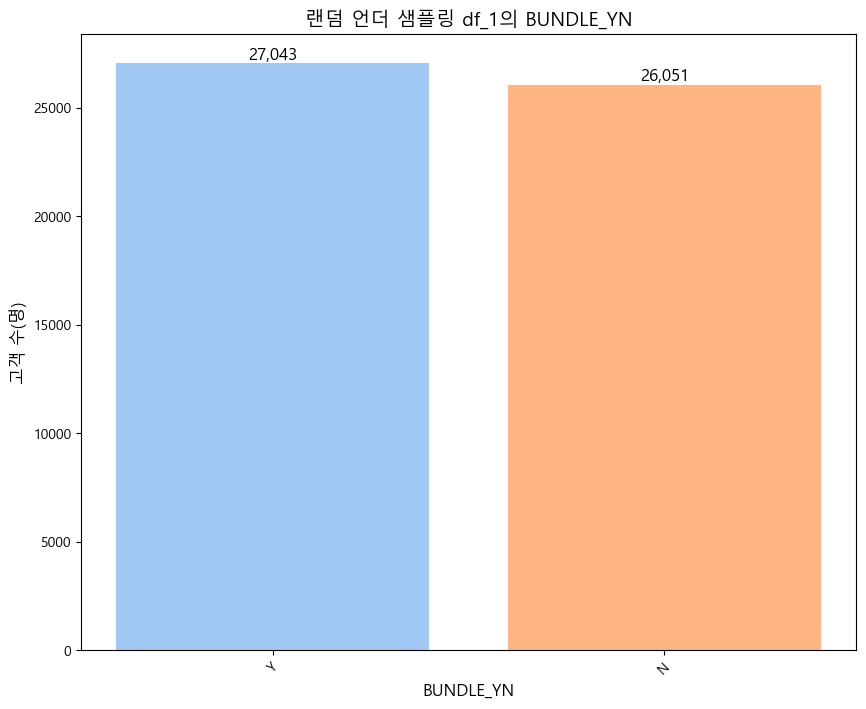

<Figure size 640x480 with 0 Axes>

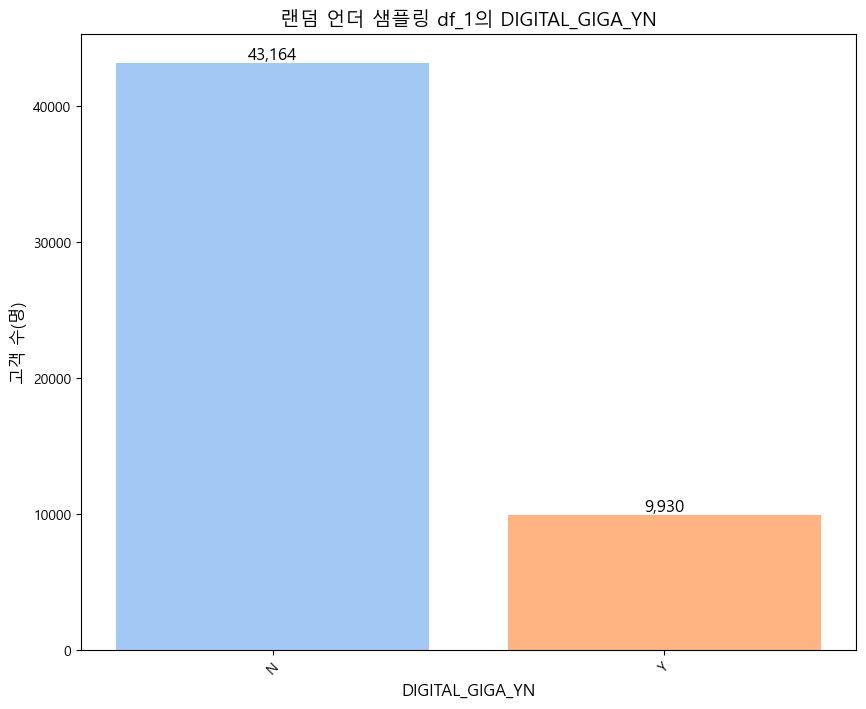

<Figure size 640x480 with 0 Axes>

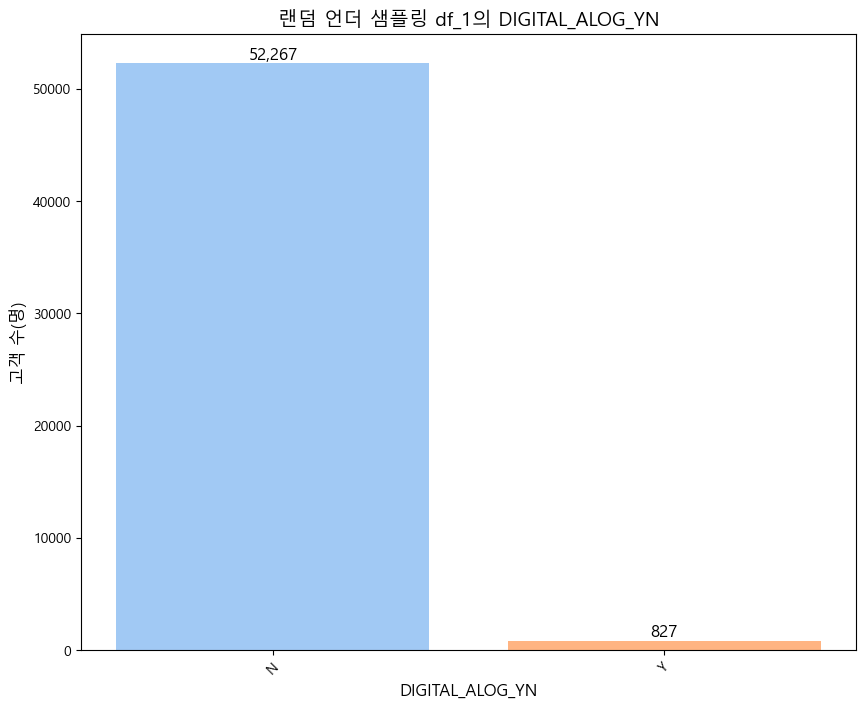

<Figure size 640x480 with 0 Axes>

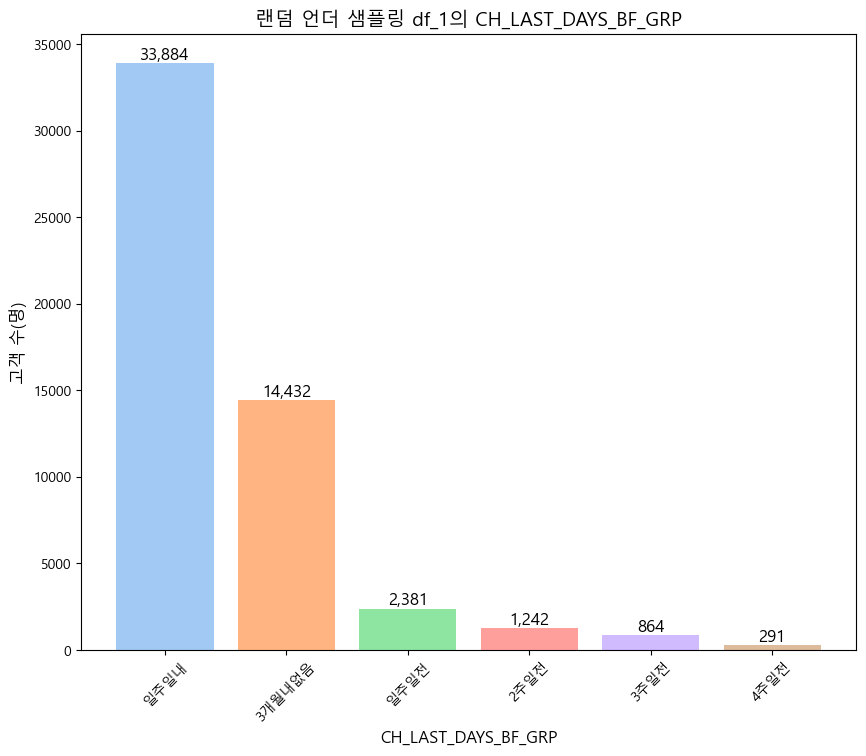

<Figure size 640x480 with 0 Axes>

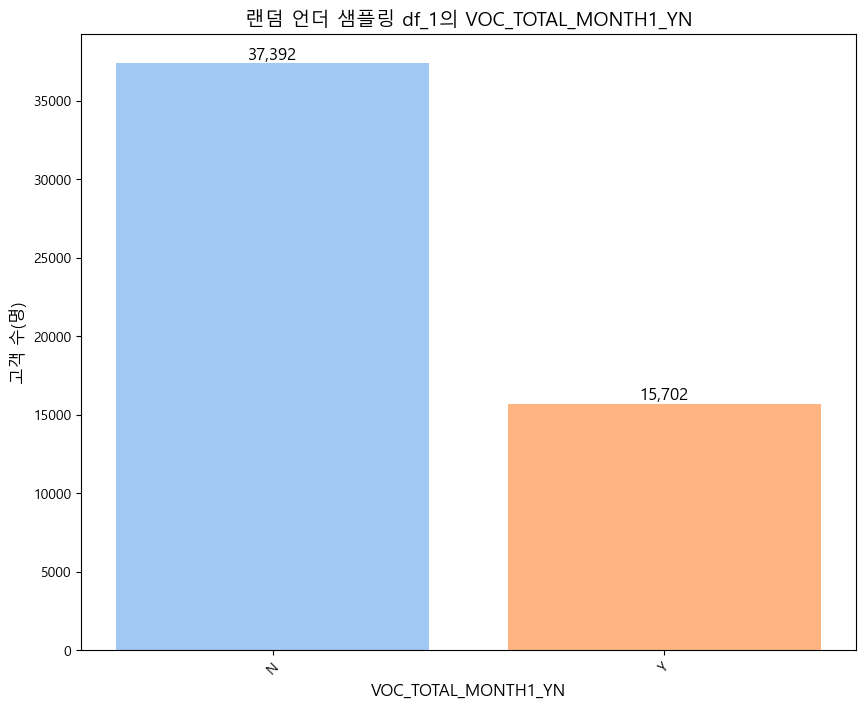

<Figure size 640x480 with 0 Axes>

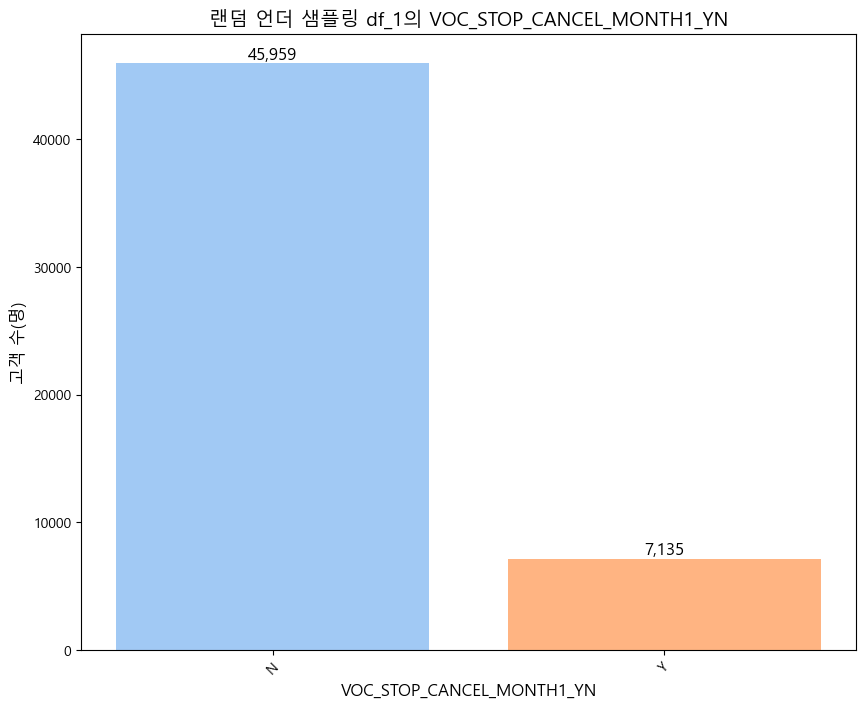

<Figure size 640x480 with 0 Axes>

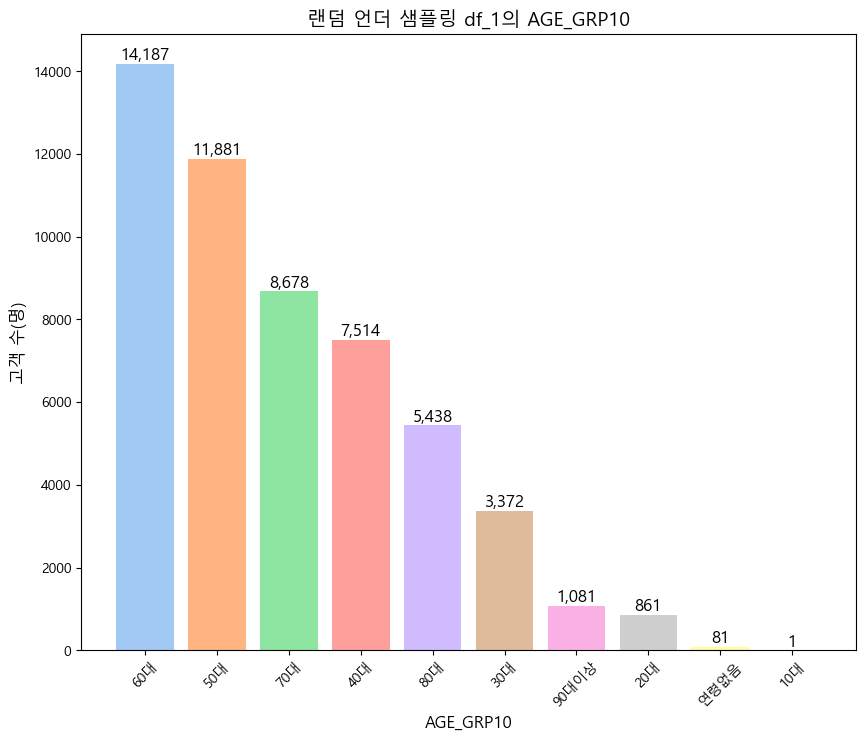

<Figure size 640x480 with 0 Axes>

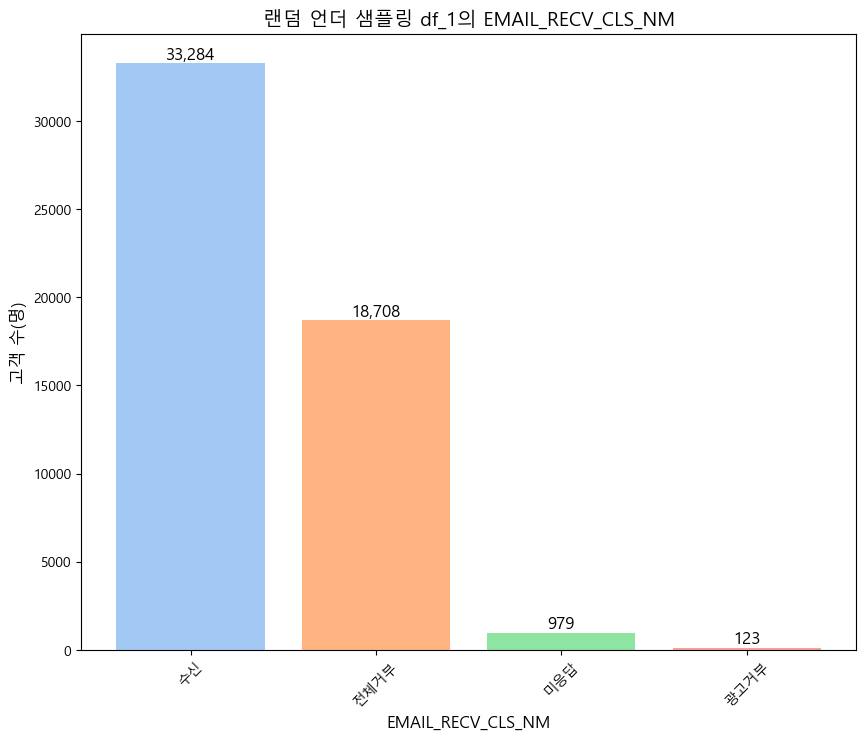

<Figure size 640x480 with 0 Axes>

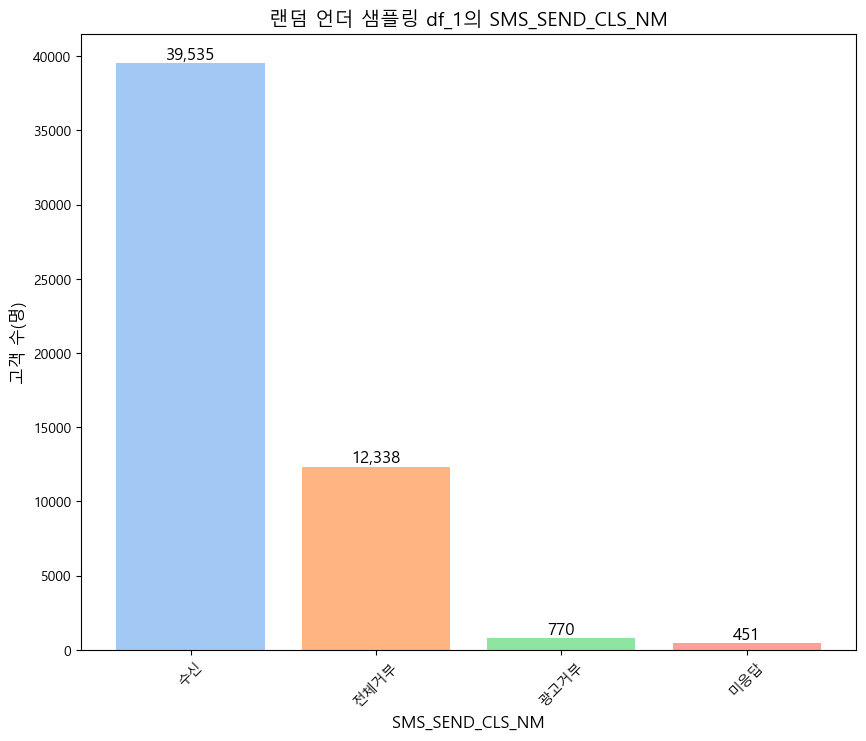

<Figure size 640x480 with 0 Axes>

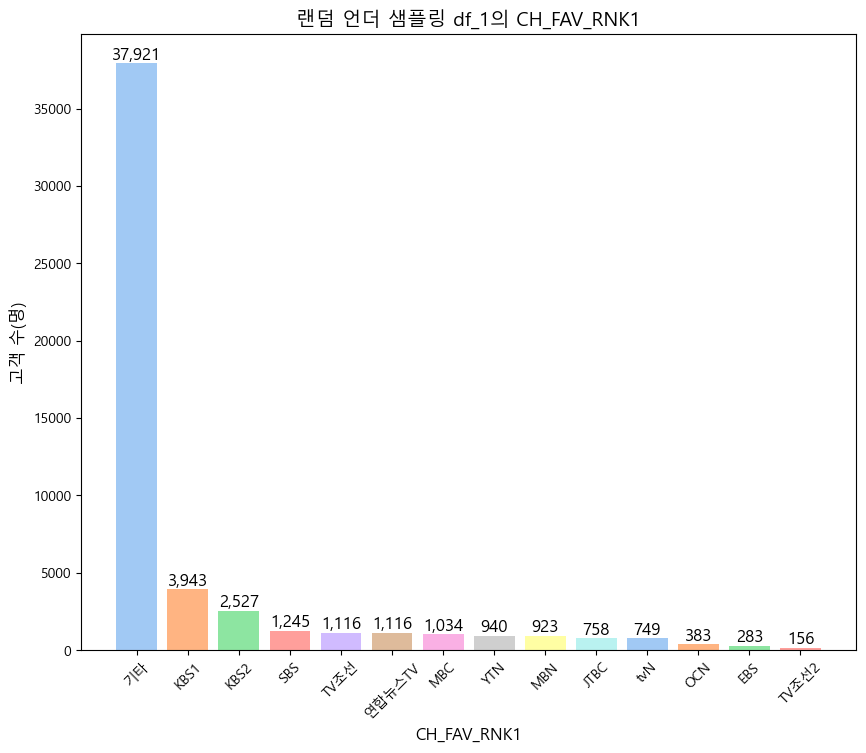

<Figure size 640x480 with 0 Axes>

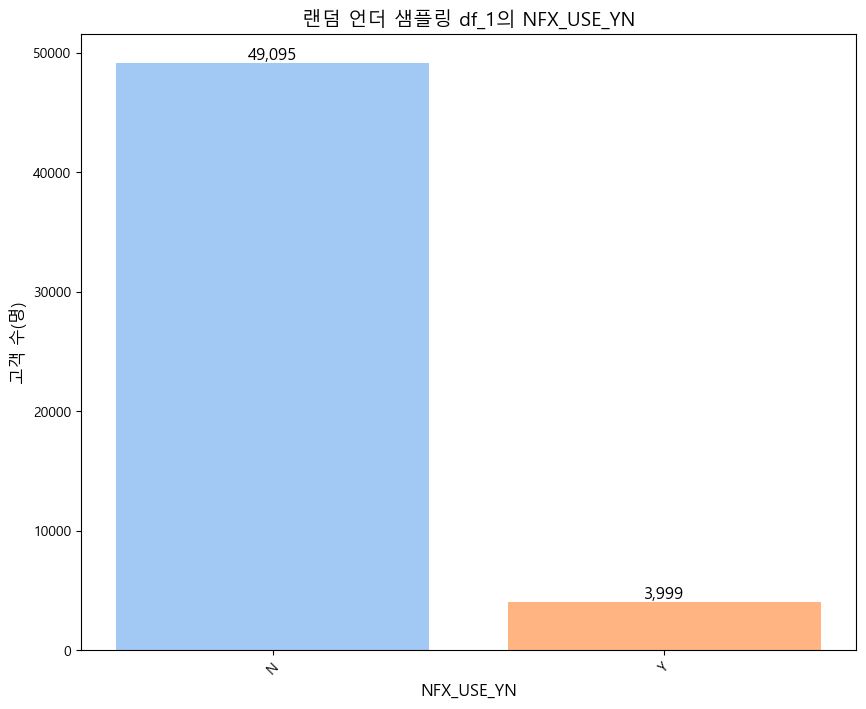

<Figure size 640x480 with 0 Axes>

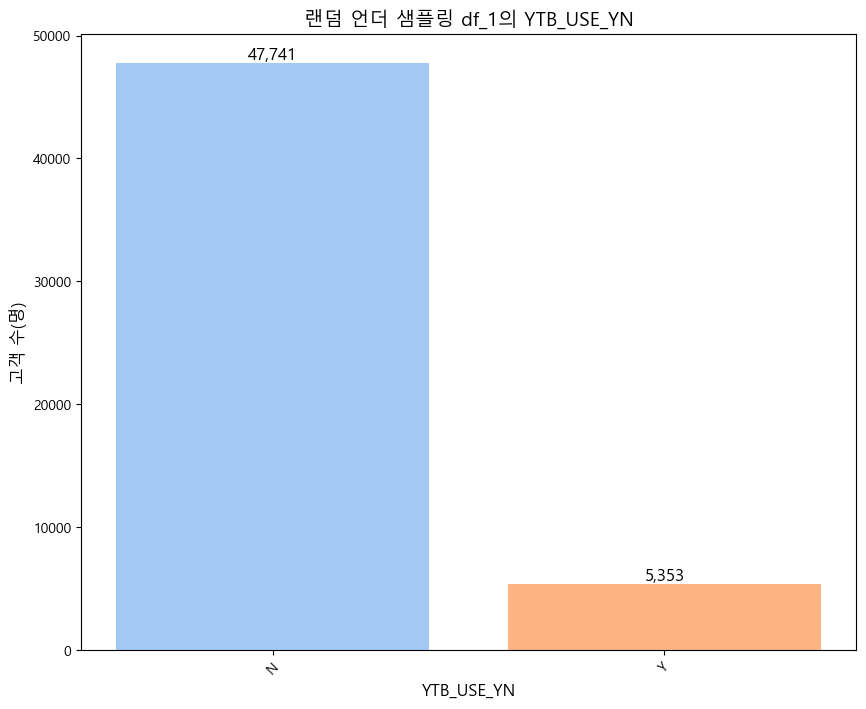

<Figure size 640x480 with 0 Axes>

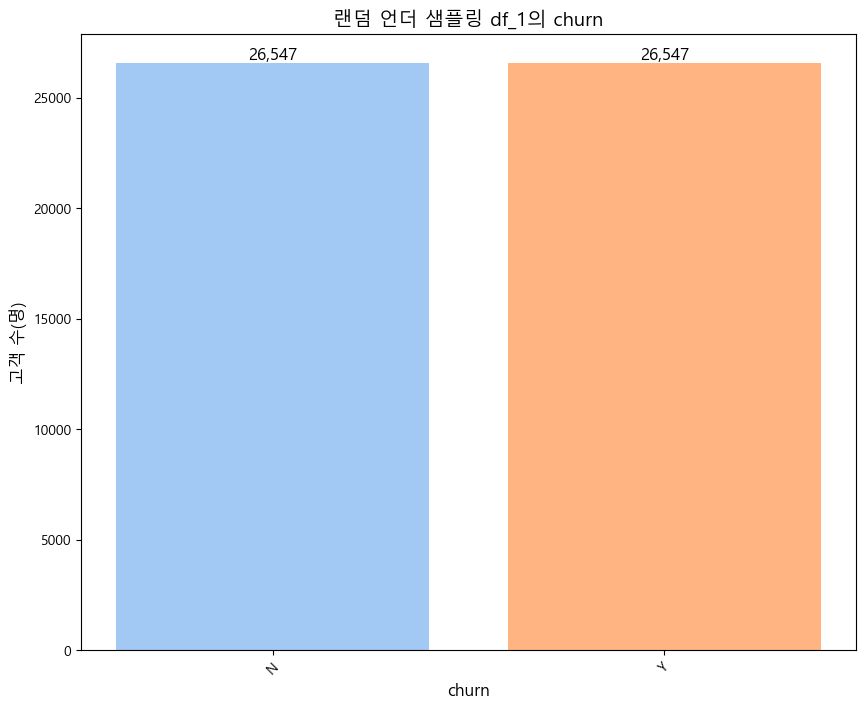

<Figure size 640x480 with 0 Axes>

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df_1.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_1[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('고객 수(명)', fontsize=12)
        plt.title(f'랜덤 언더 샘플링 df_1의 {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()
        plt.clf()


#### df_2 SMOTE-NC 확인

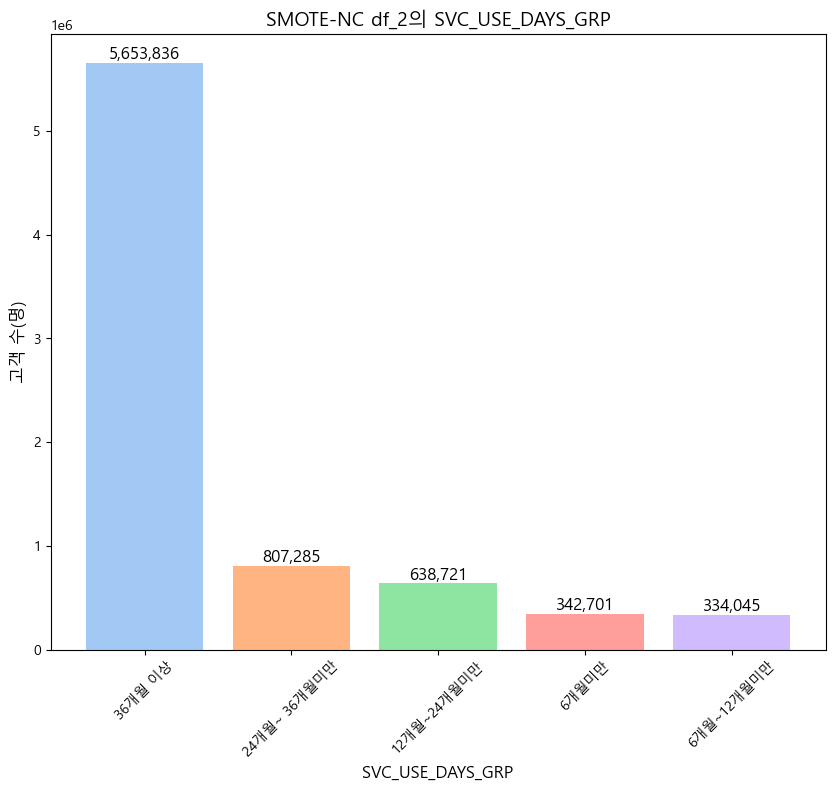

<Figure size 640x480 with 0 Axes>

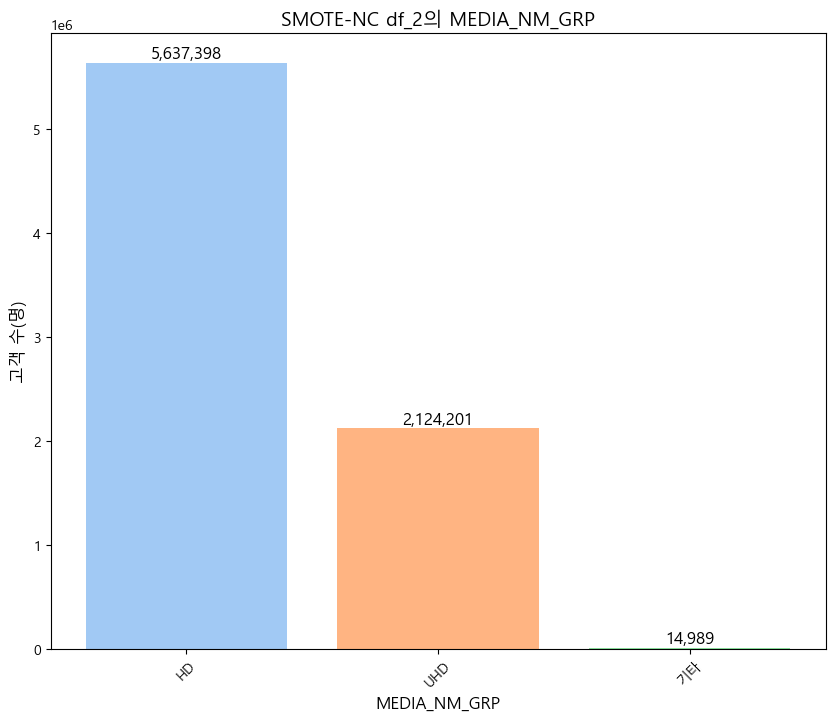

<Figure size 640x480 with 0 Axes>

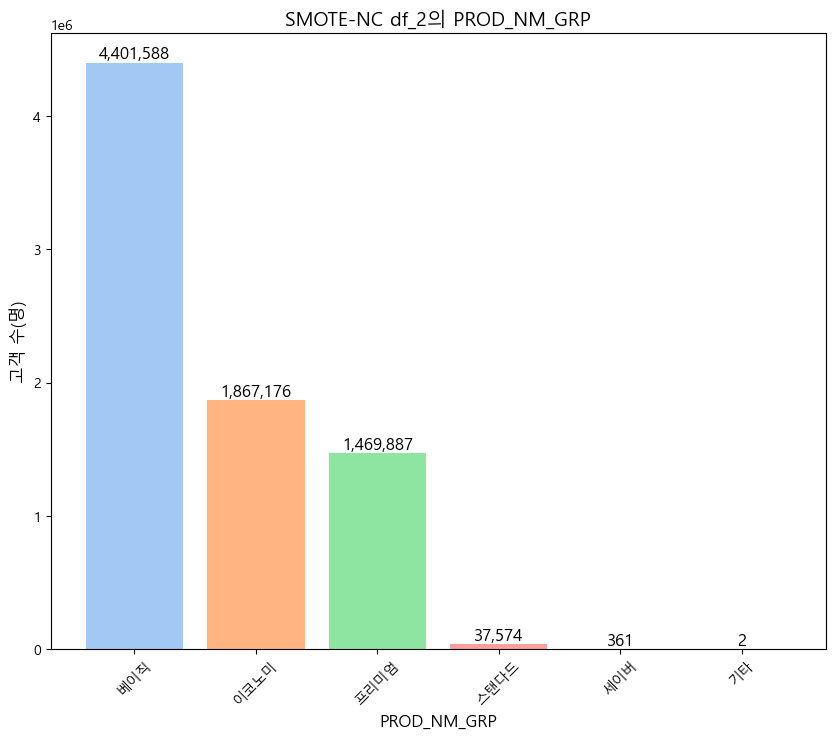

<Figure size 640x480 with 0 Axes>

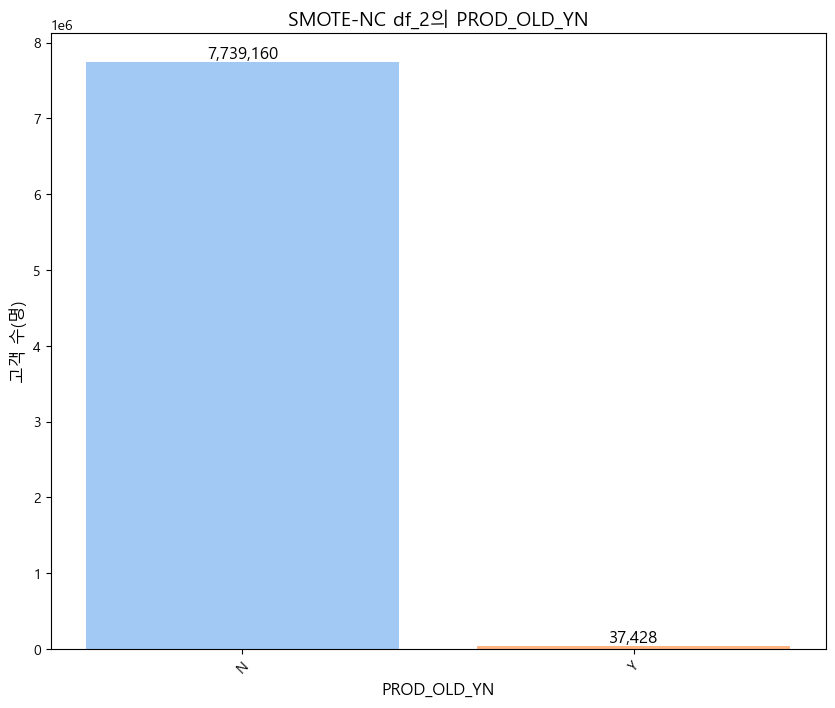

<Figure size 640x480 with 0 Axes>

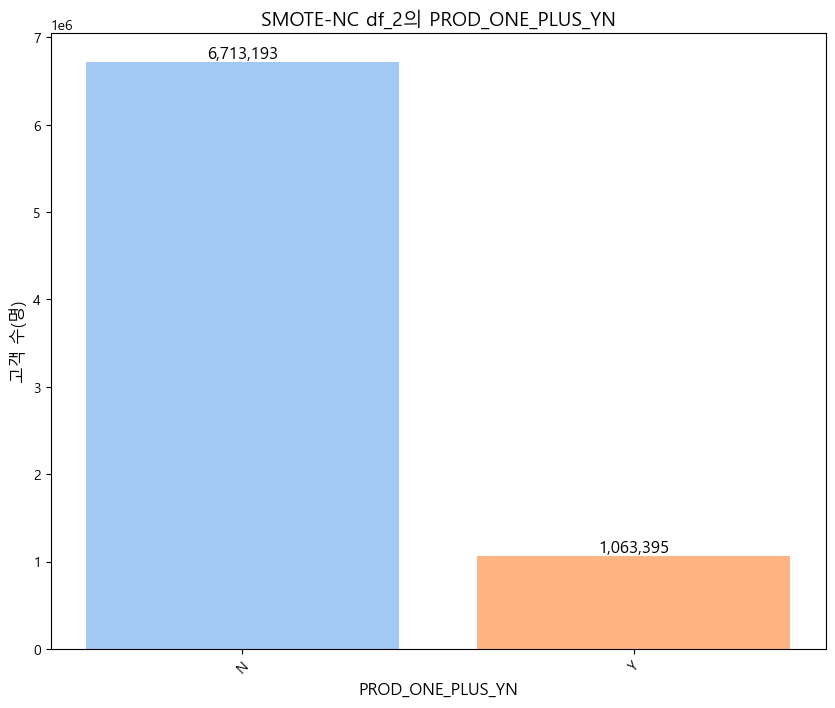

<Figure size 640x480 with 0 Axes>

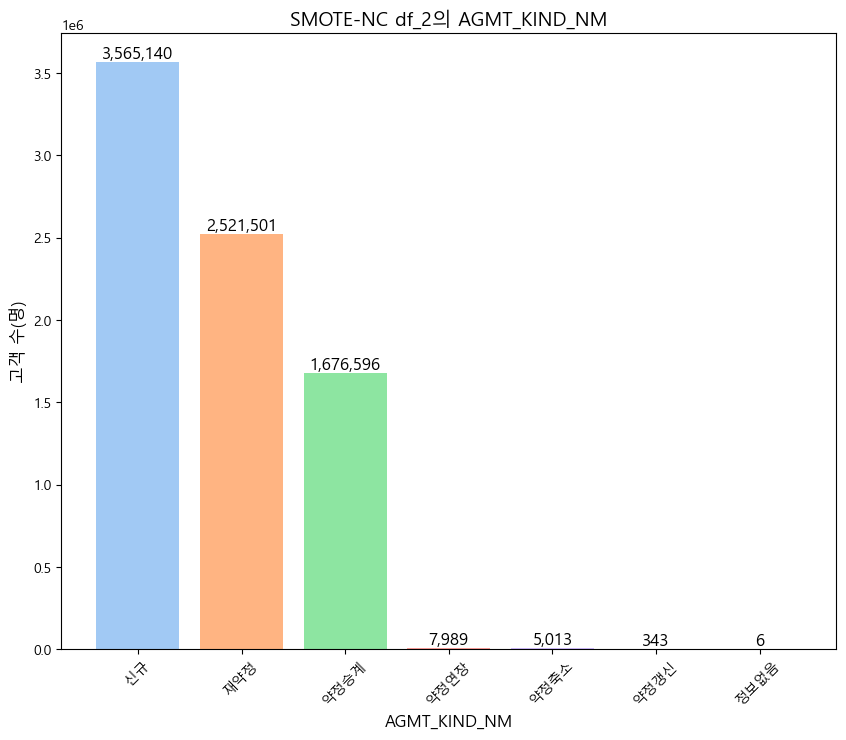

<Figure size 640x480 with 0 Axes>

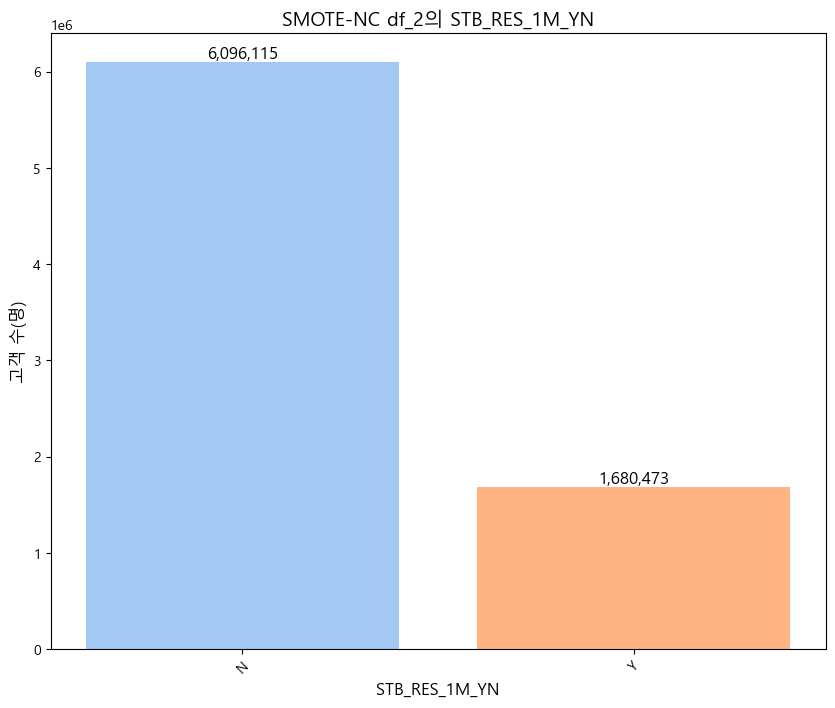

<Figure size 640x480 with 0 Axes>

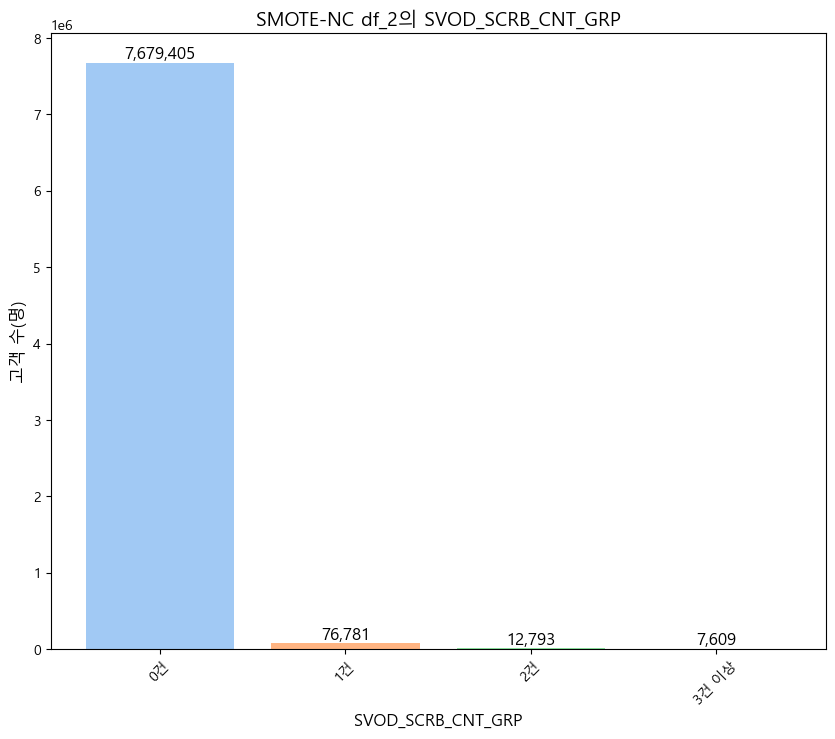

<Figure size 640x480 with 0 Axes>

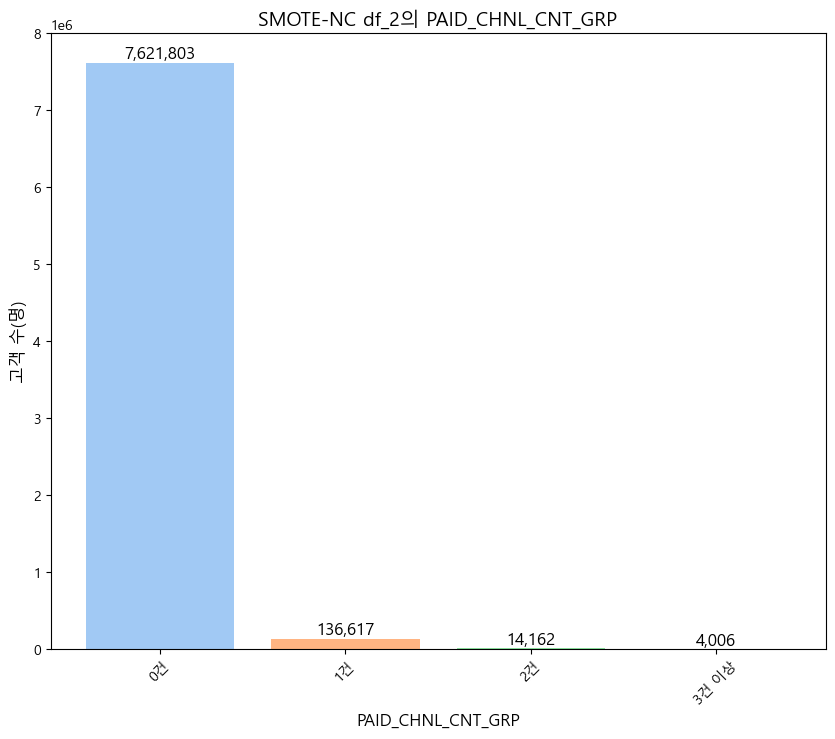

<Figure size 640x480 with 0 Axes>

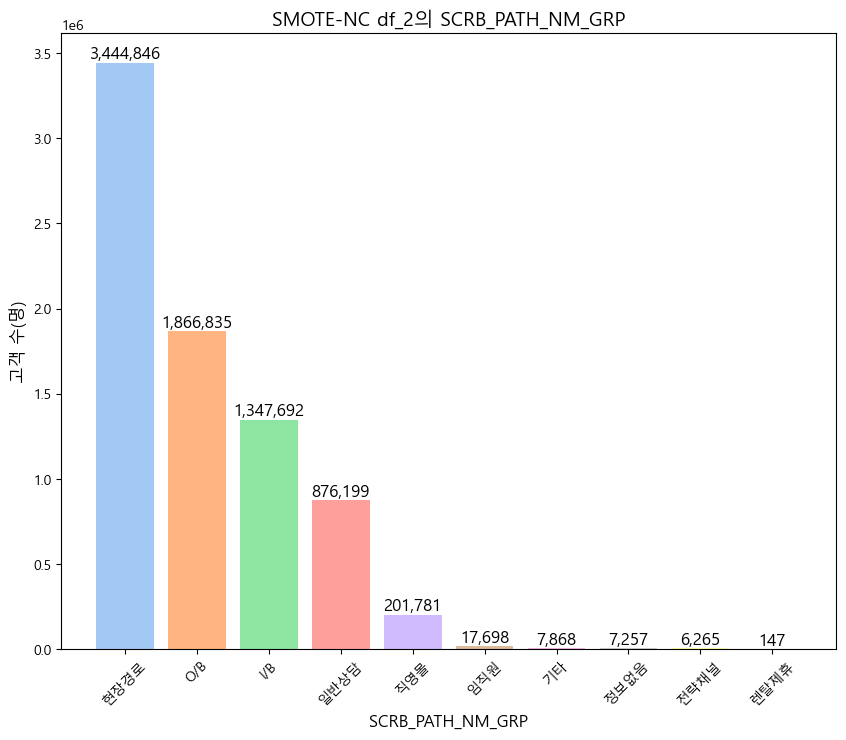

<Figure size 640x480 with 0 Axes>

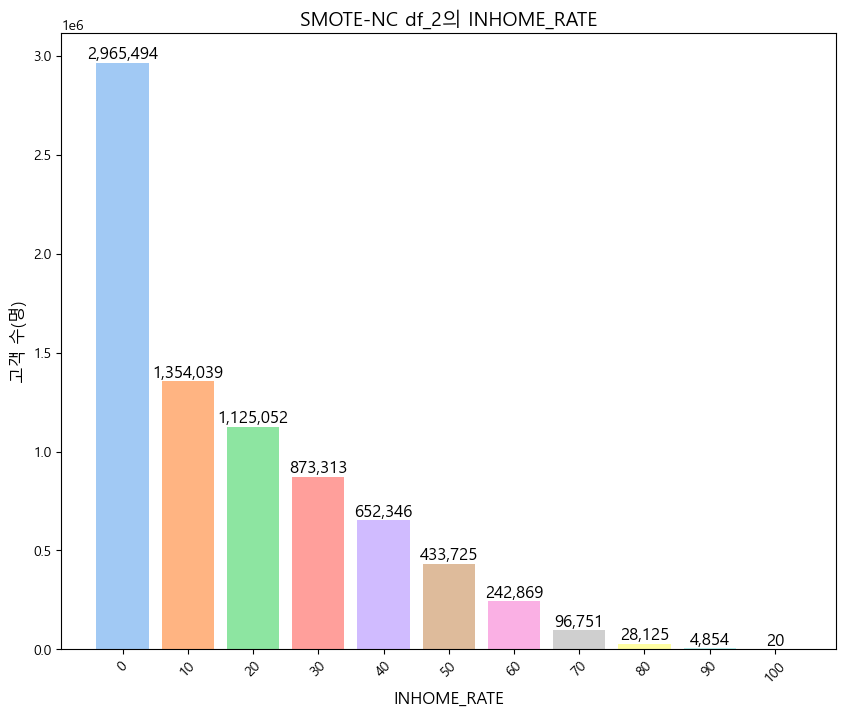

<Figure size 640x480 with 0 Axes>

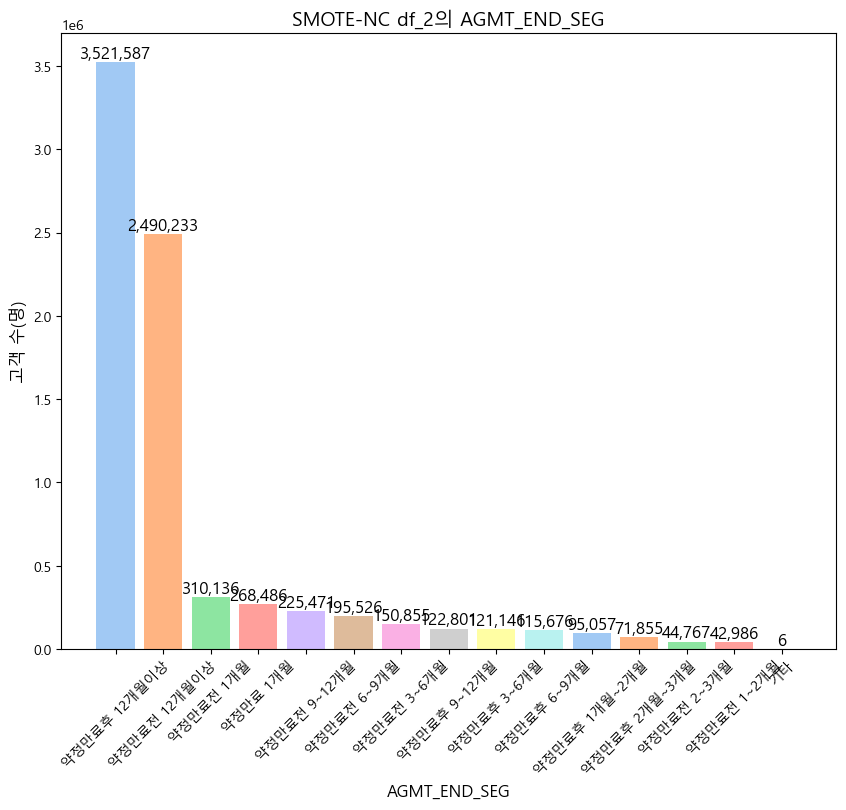

<Figure size 640x480 with 0 Axes>

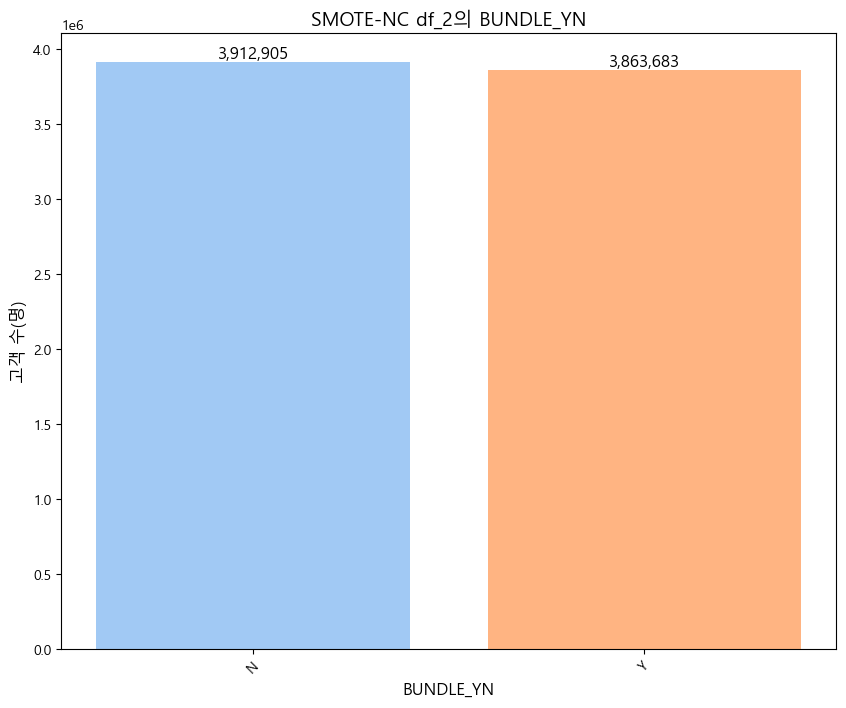

<Figure size 640x480 with 0 Axes>

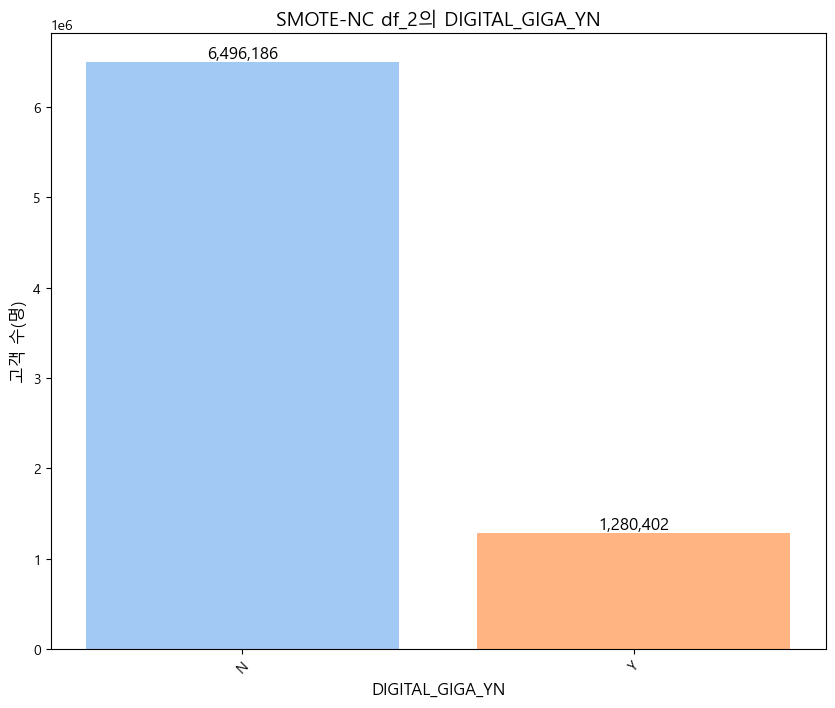

<Figure size 640x480 with 0 Axes>

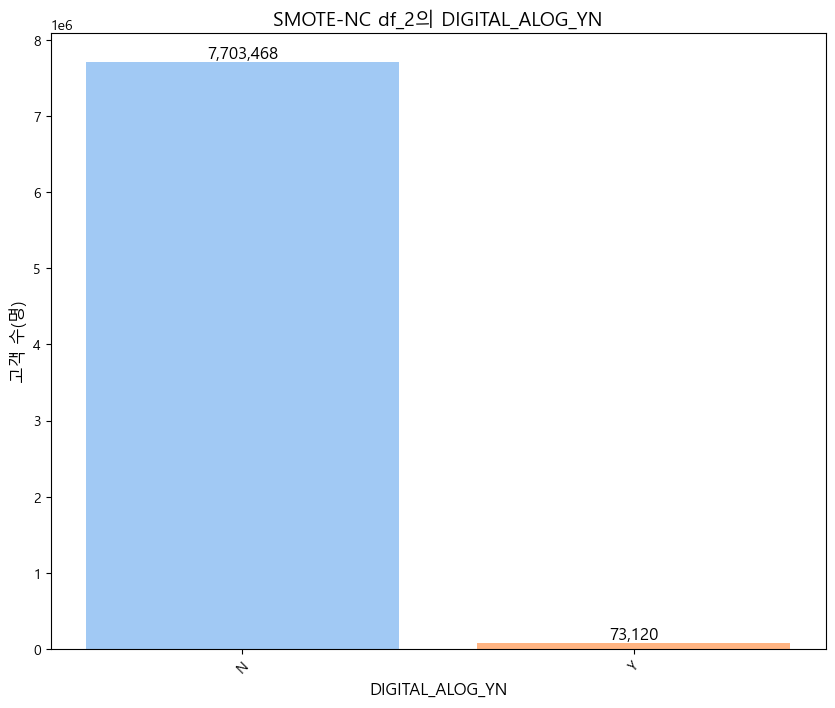

<Figure size 640x480 with 0 Axes>

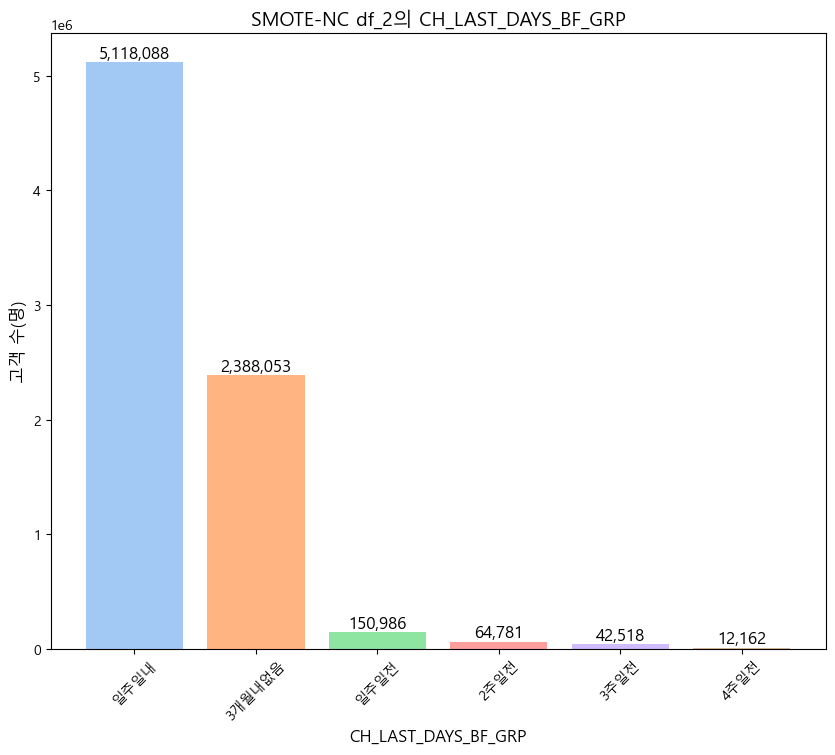

<Figure size 640x480 with 0 Axes>

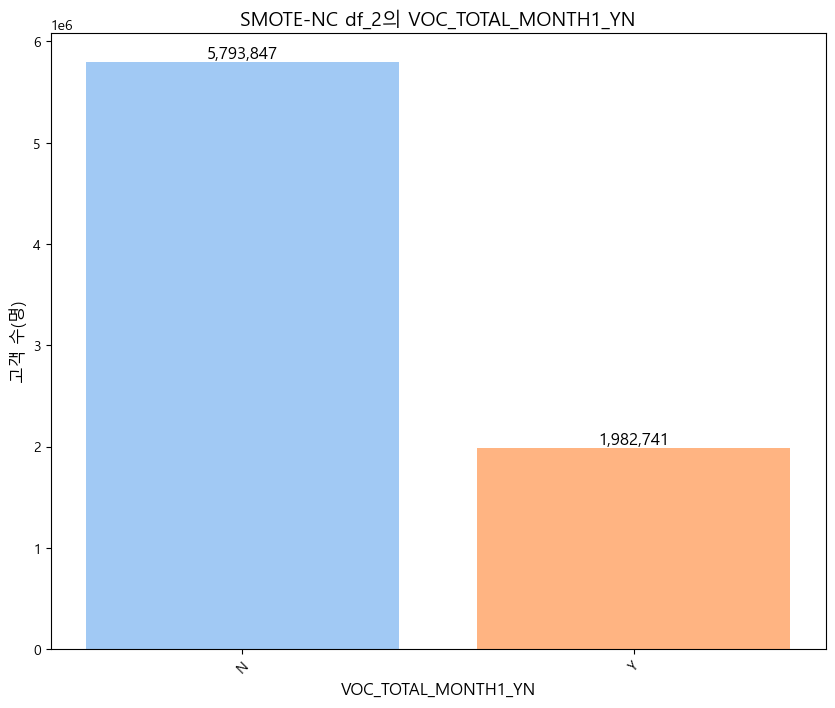

<Figure size 640x480 with 0 Axes>

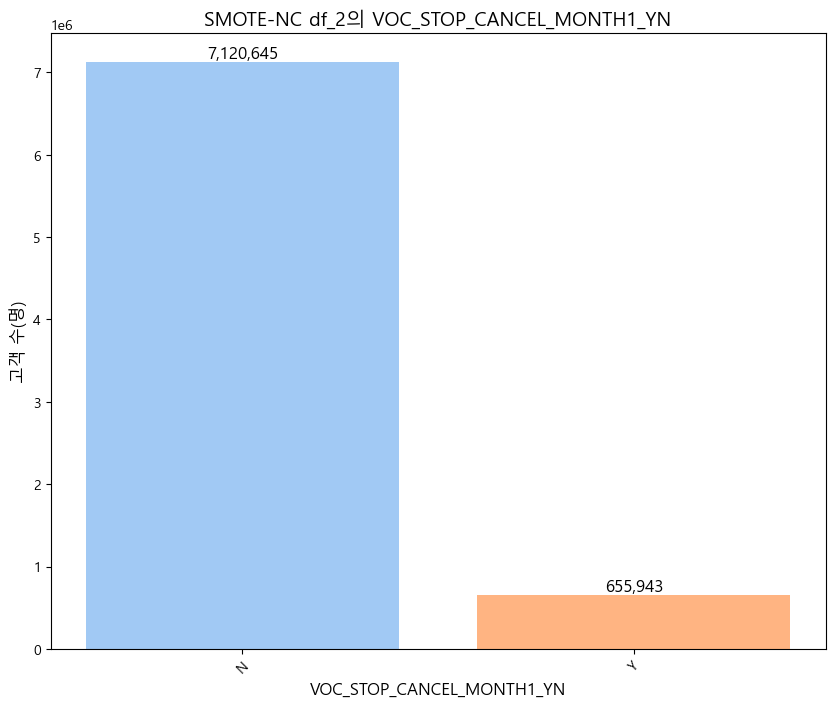

<Figure size 640x480 with 0 Axes>

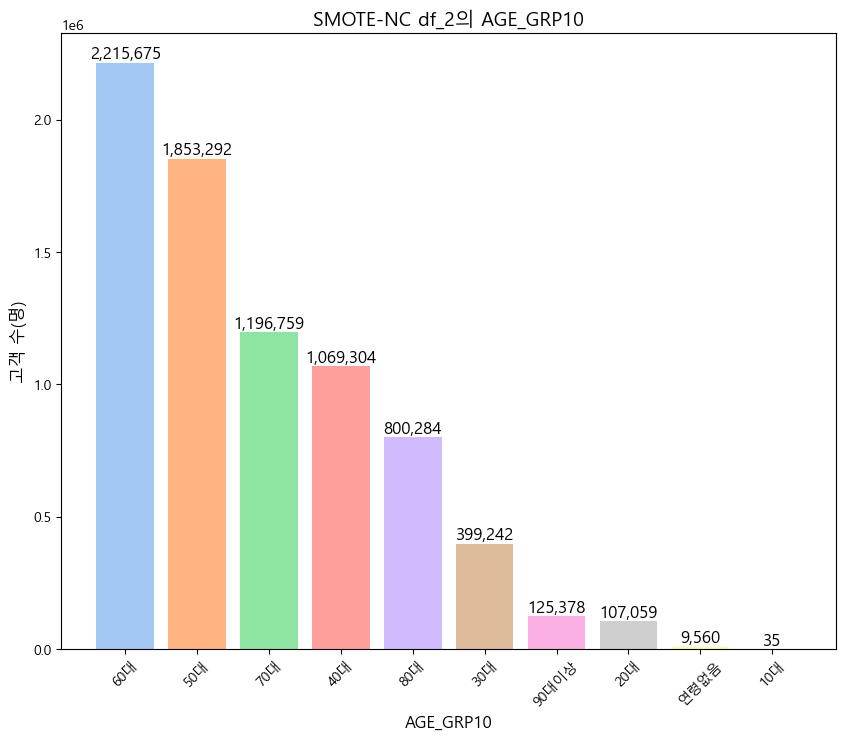

<Figure size 640x480 with 0 Axes>

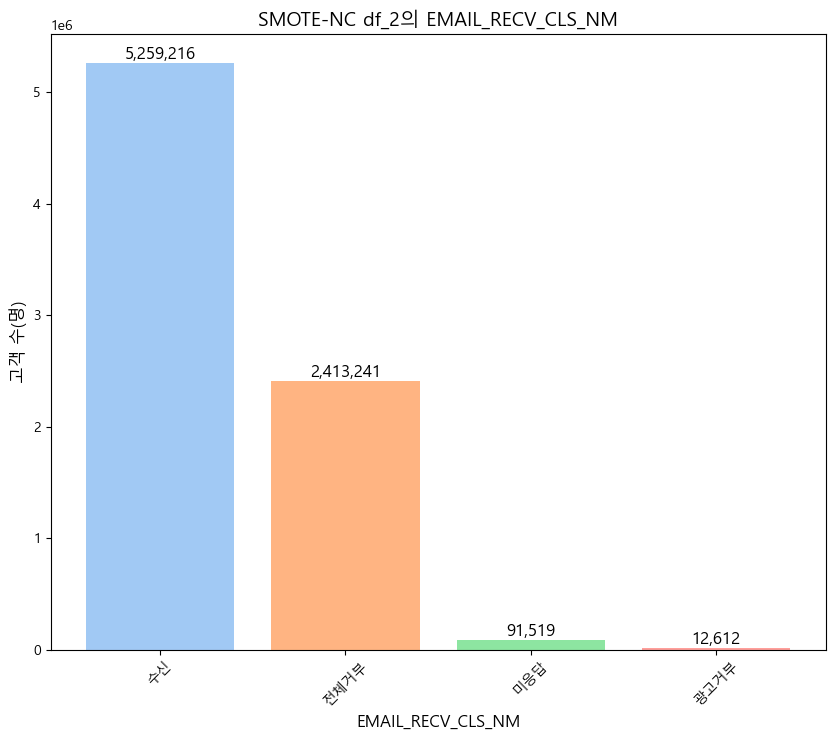

<Figure size 640x480 with 0 Axes>

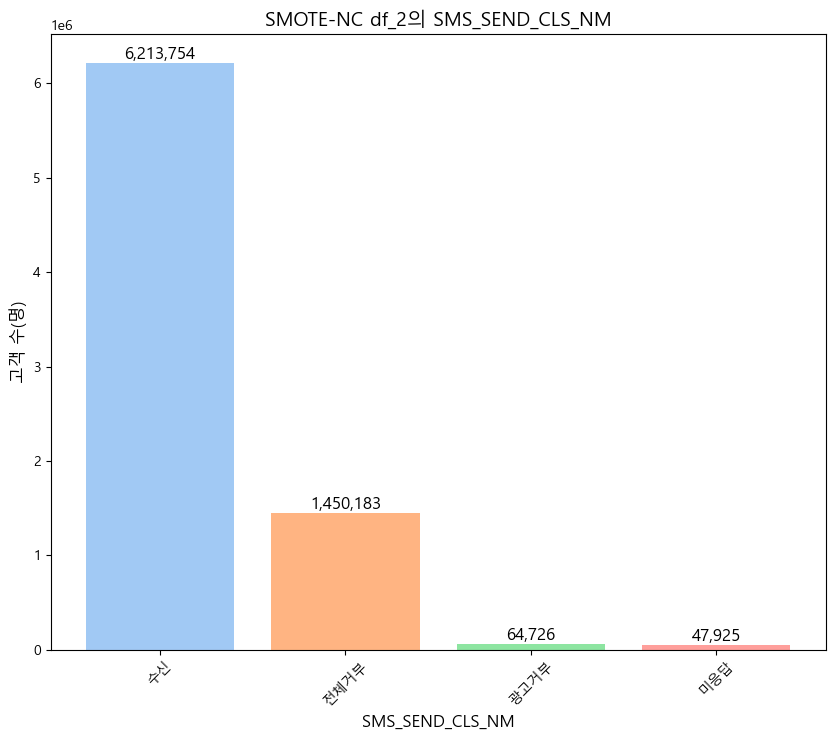

<Figure size 640x480 with 0 Axes>

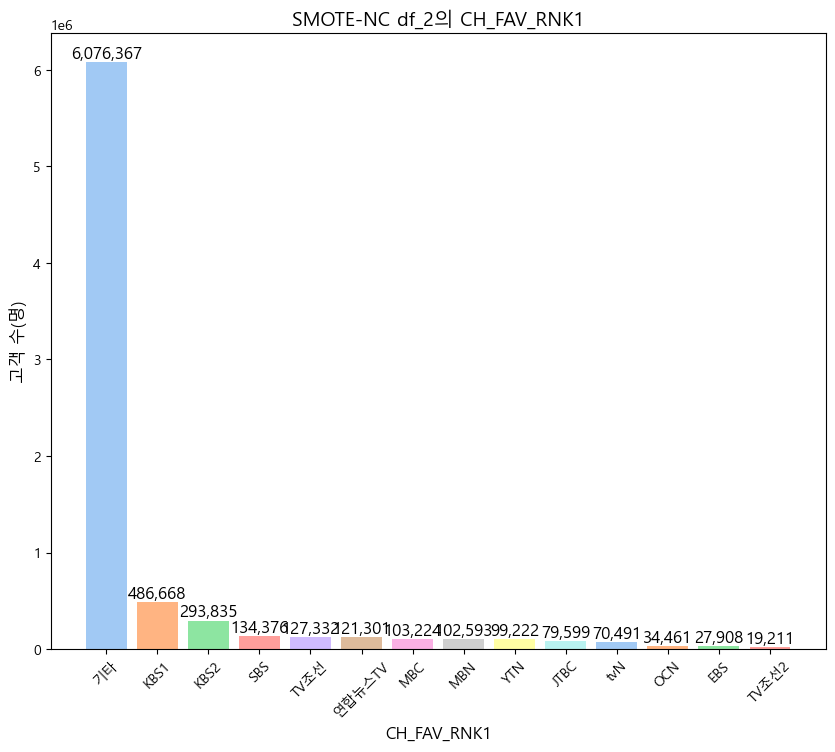

<Figure size 640x480 with 0 Axes>

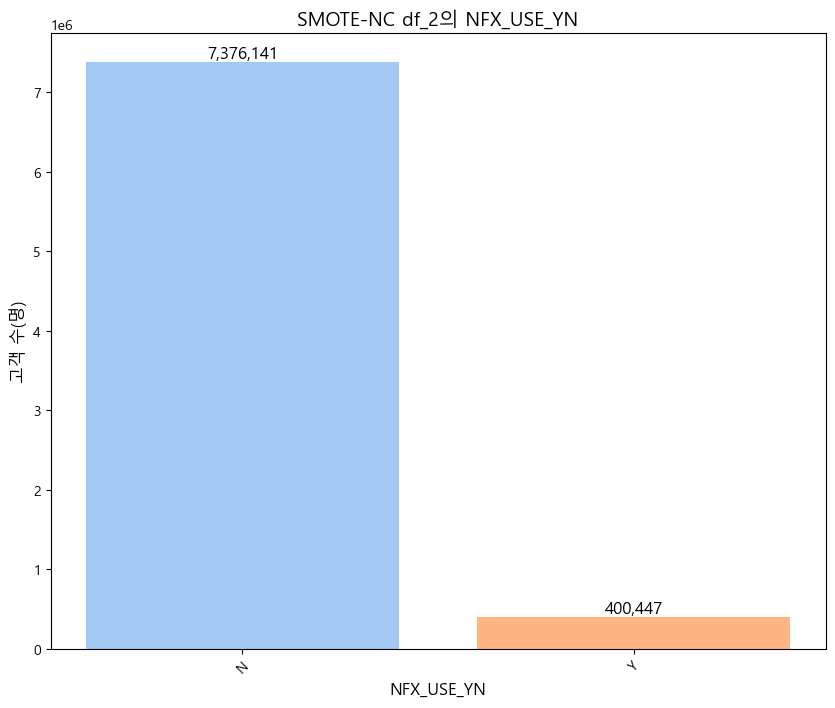

<Figure size 640x480 with 0 Axes>

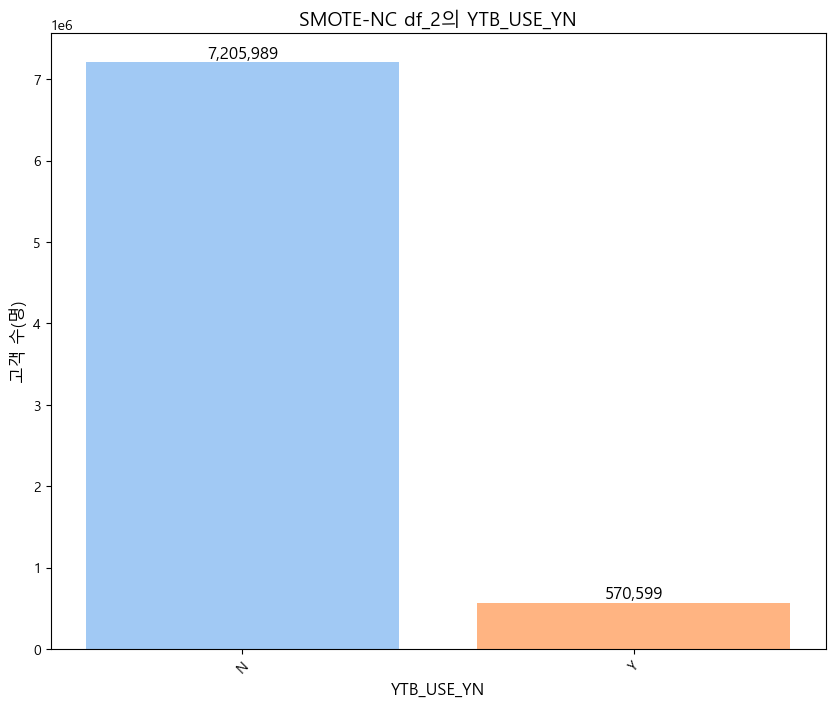

<Figure size 640x480 with 0 Axes>

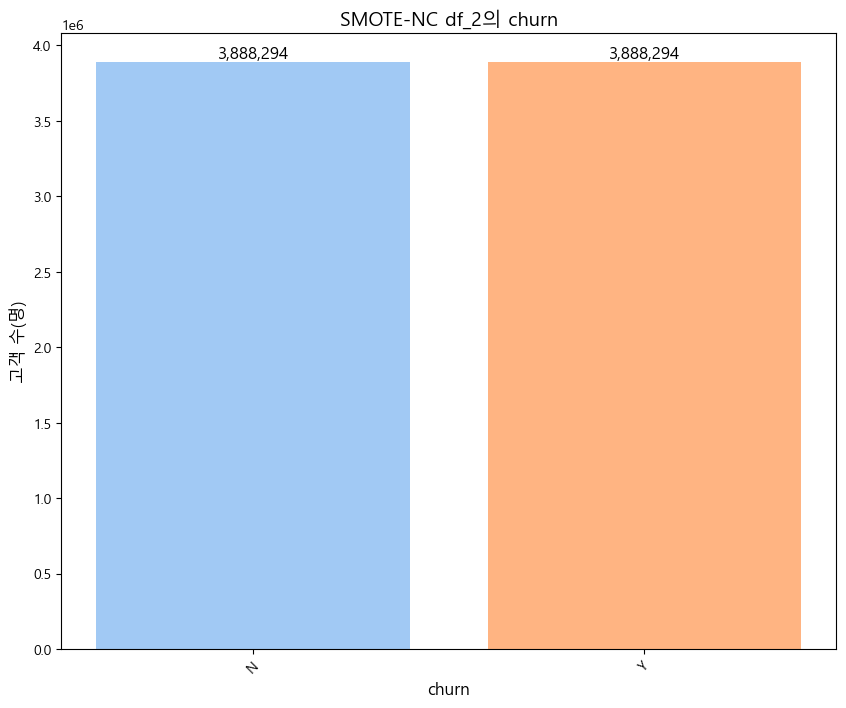

<Figure size 640x480 with 0 Axes>

In [61]:
object_columns = df_2.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_2[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('고객 수(명)', fontsize=12)
        plt.title(f'SMOTE-NC df_2의 {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()
        plt.clf()

#### df_3 SMOTE-NC + 랜덤 언더 샘플링 확인

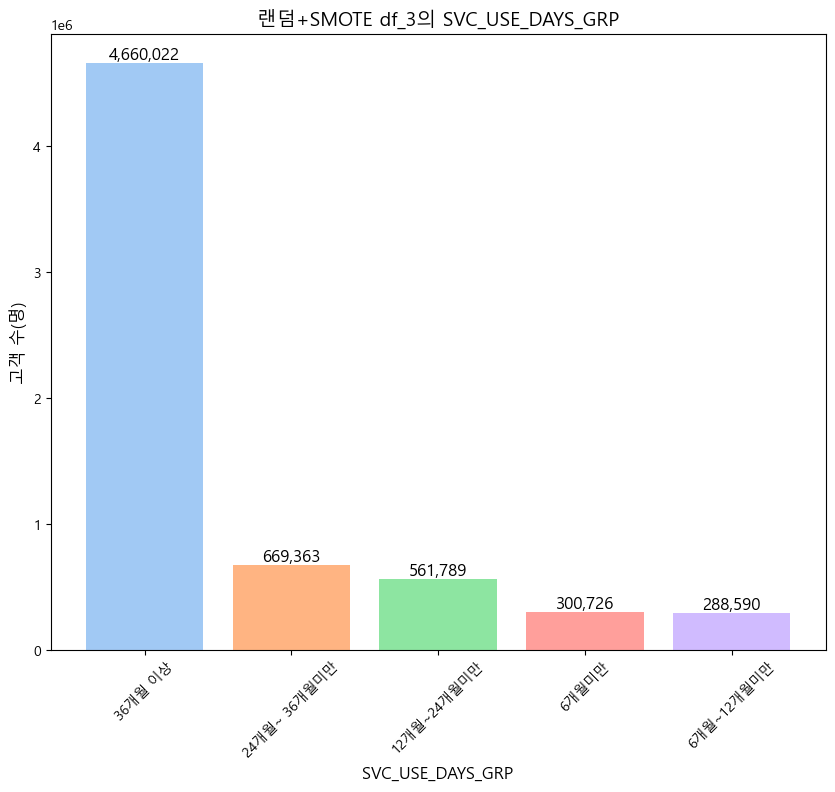

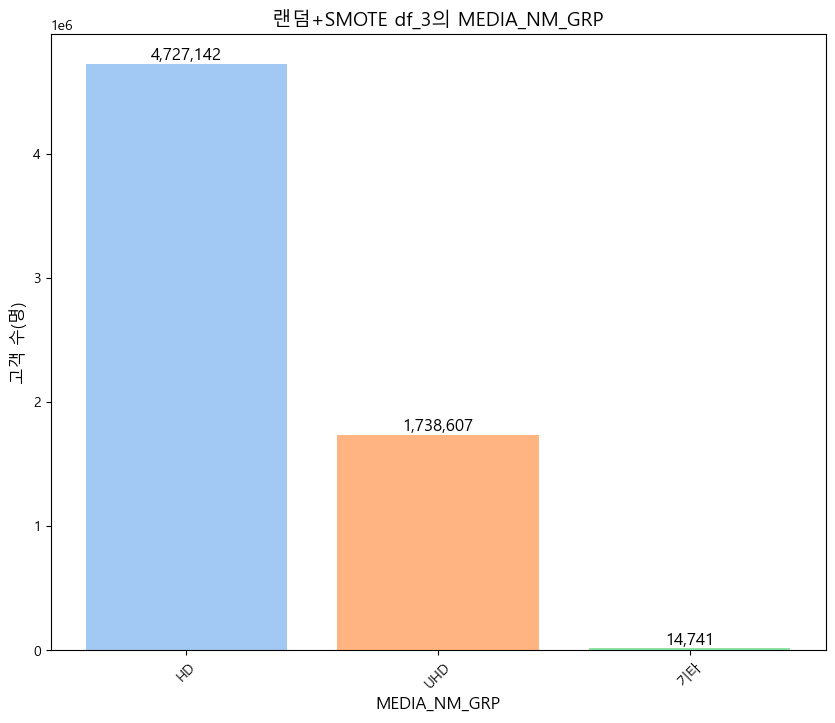

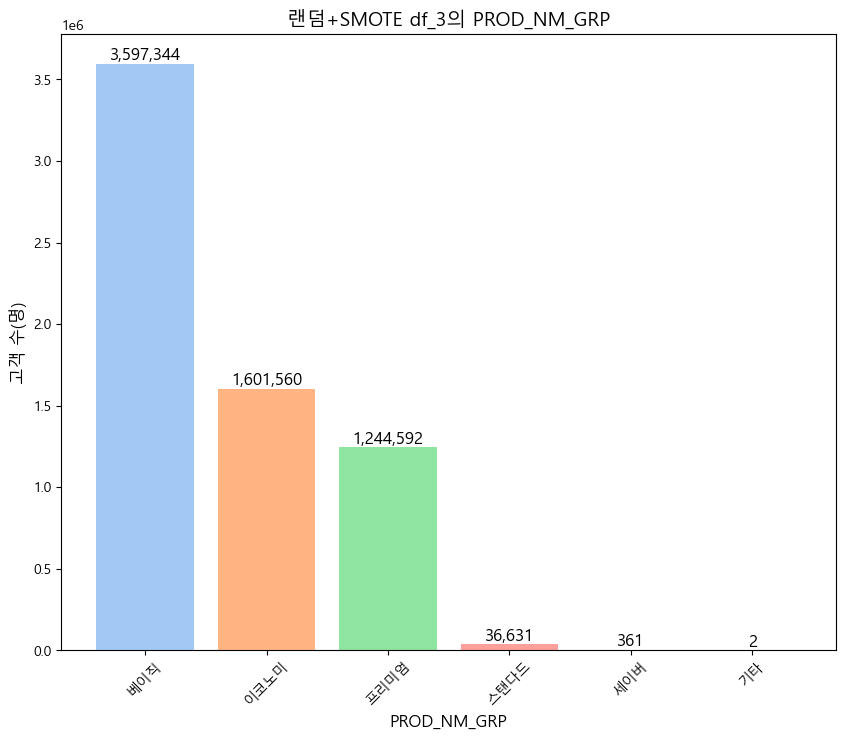

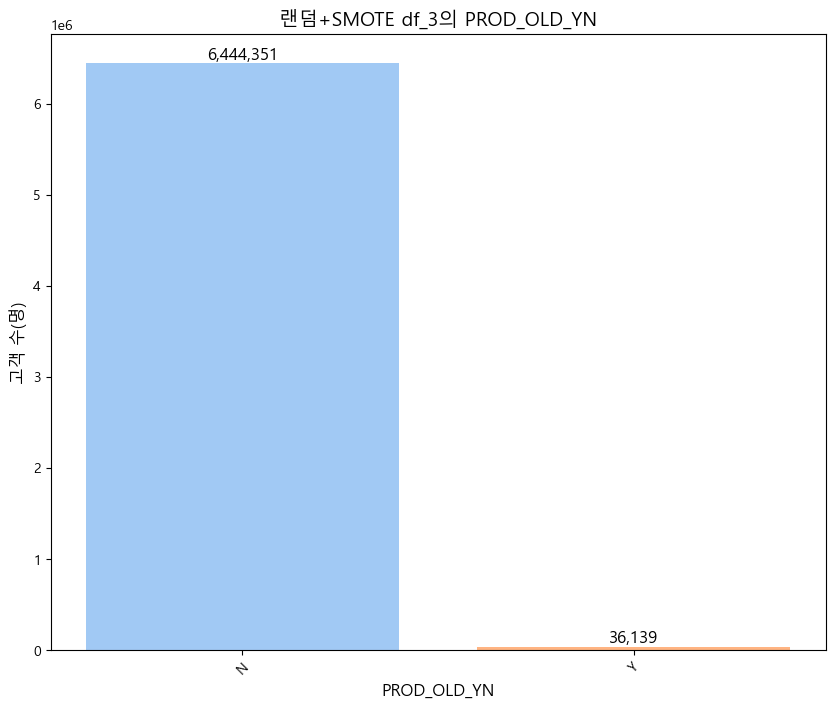

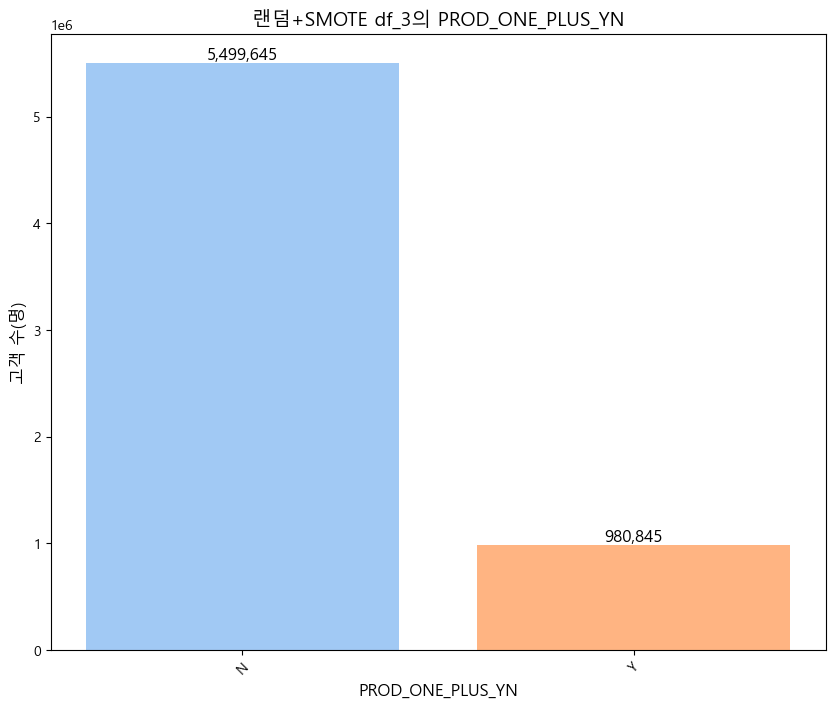

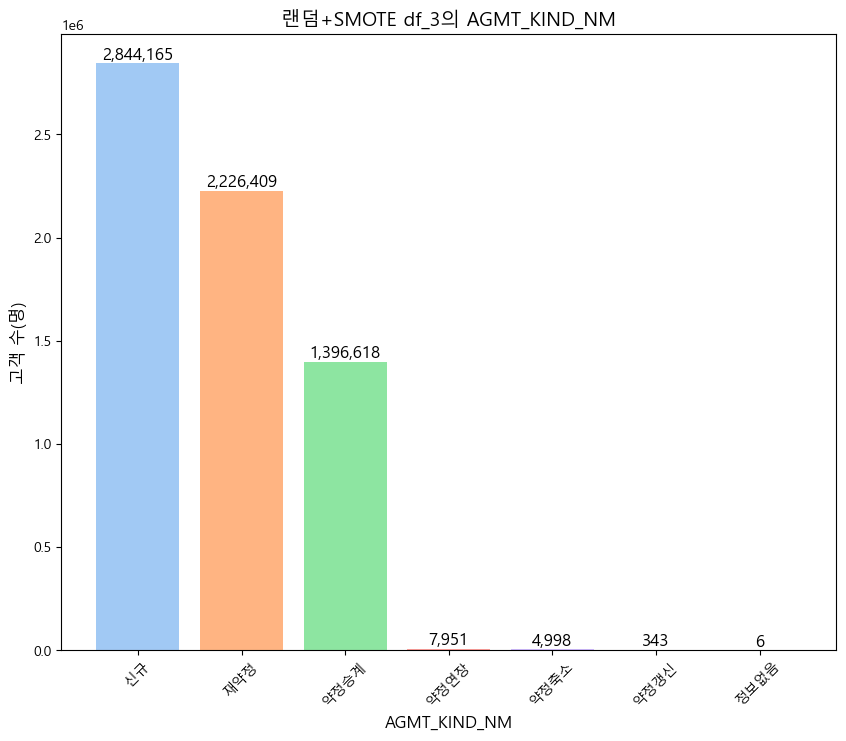

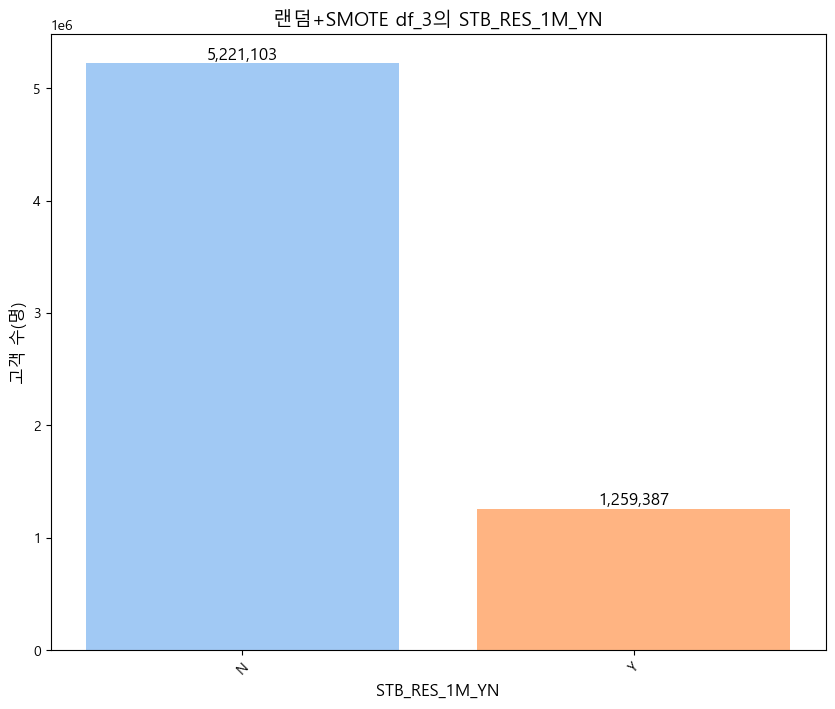

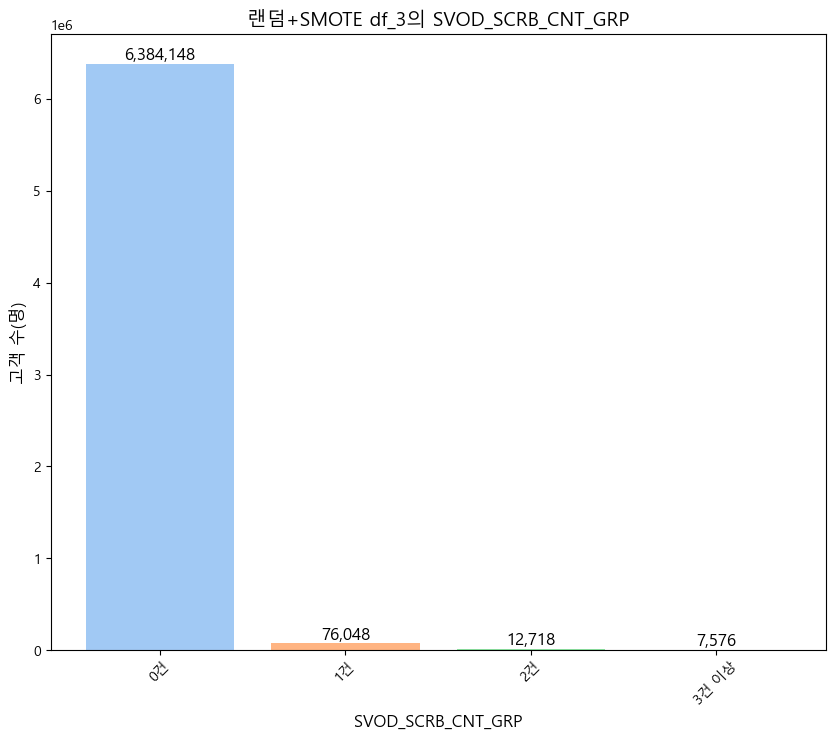

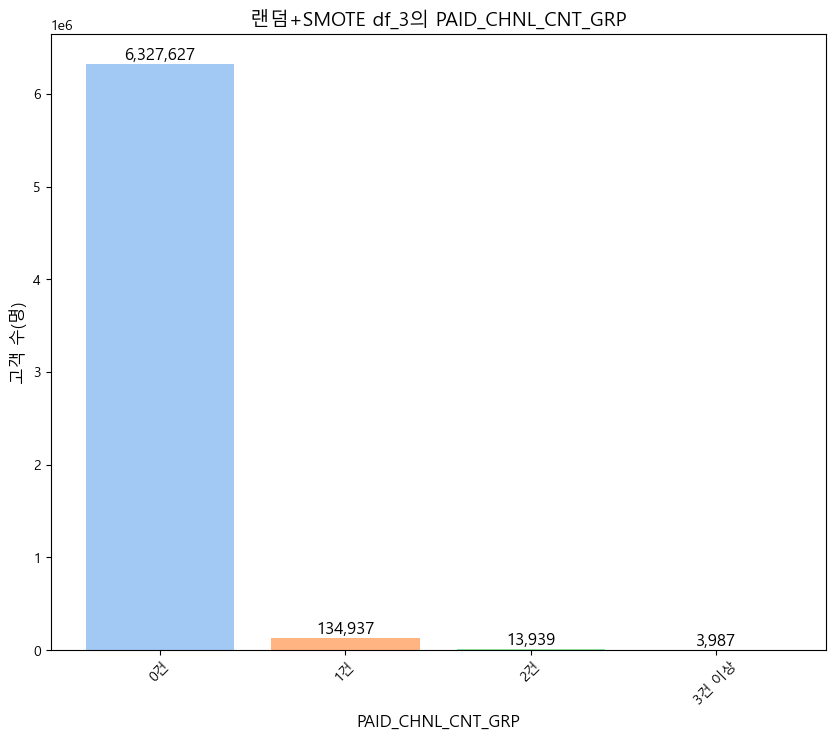

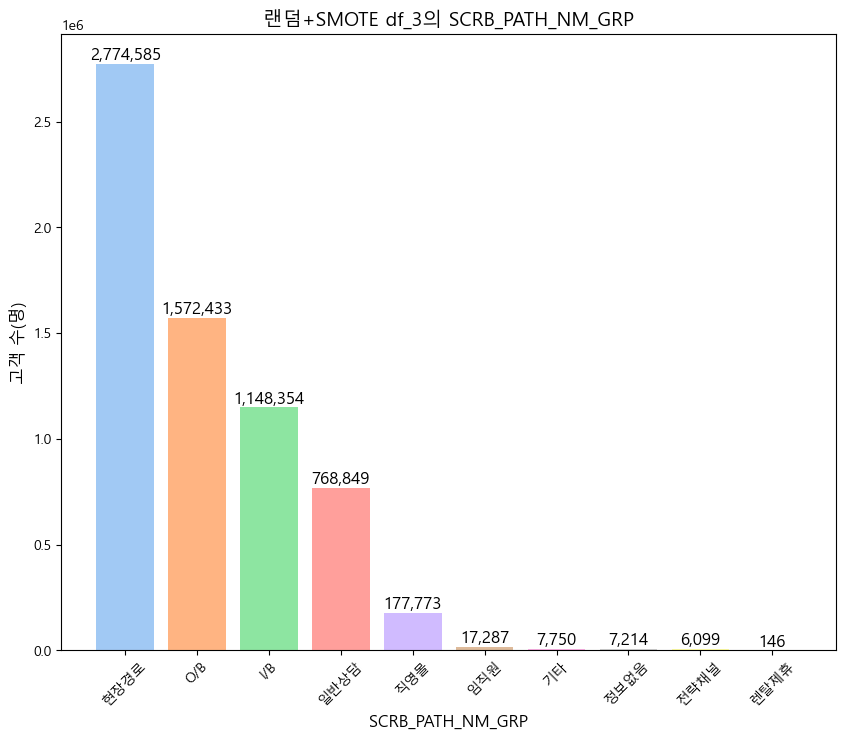

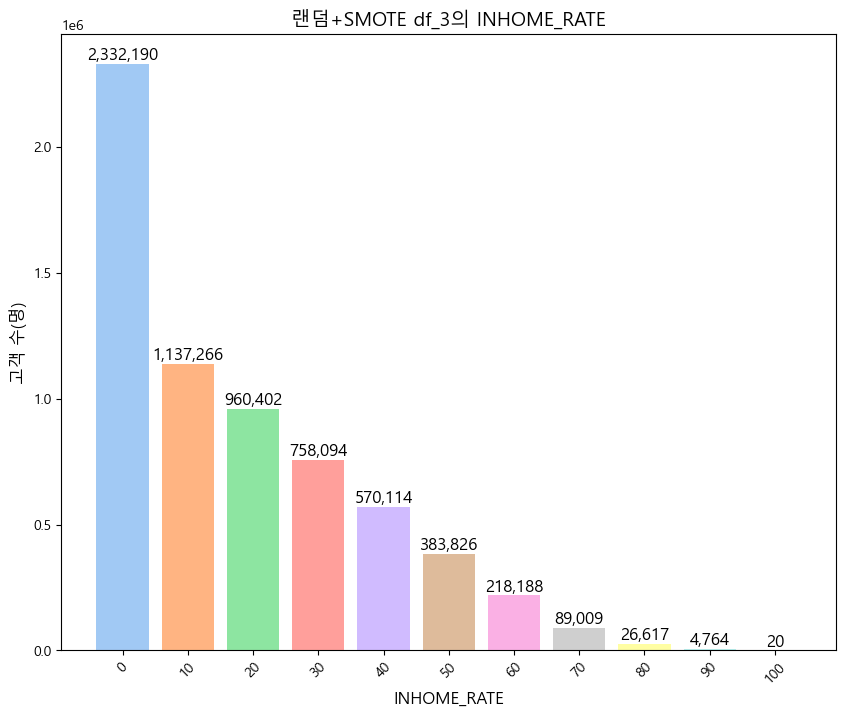

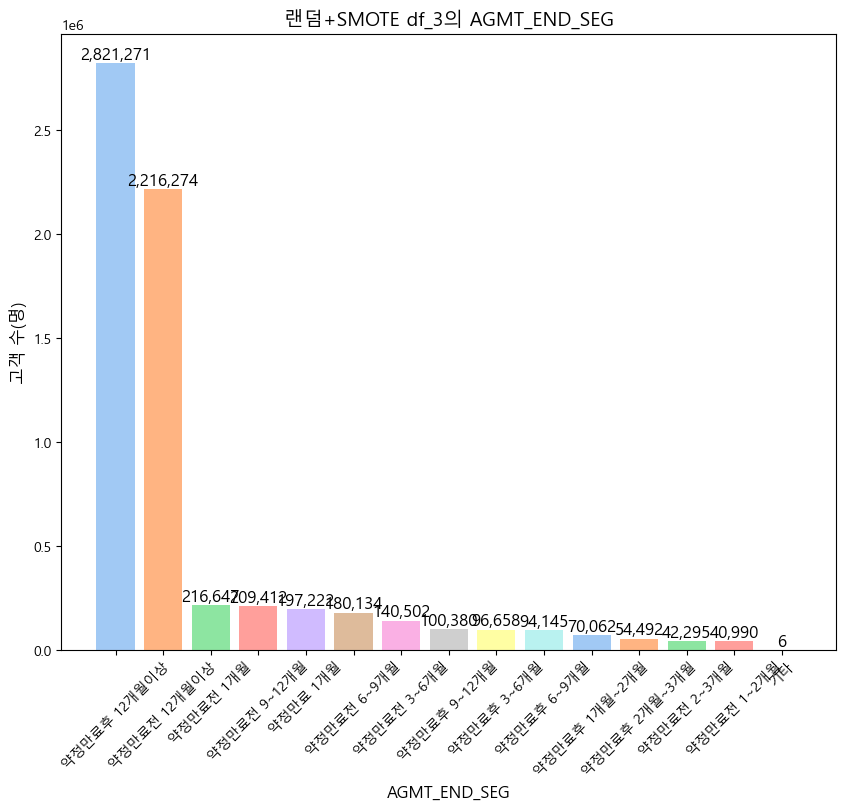

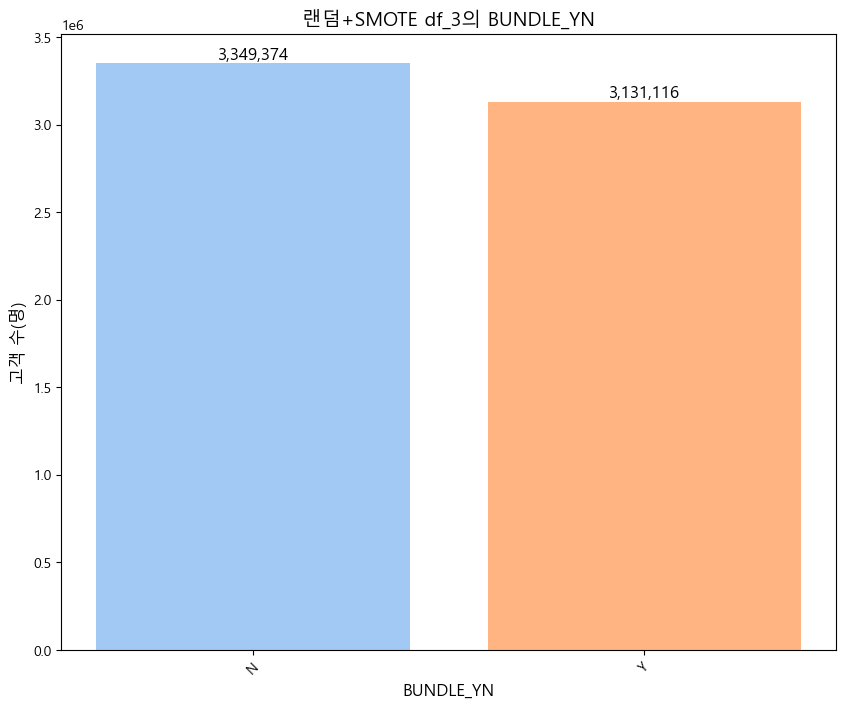

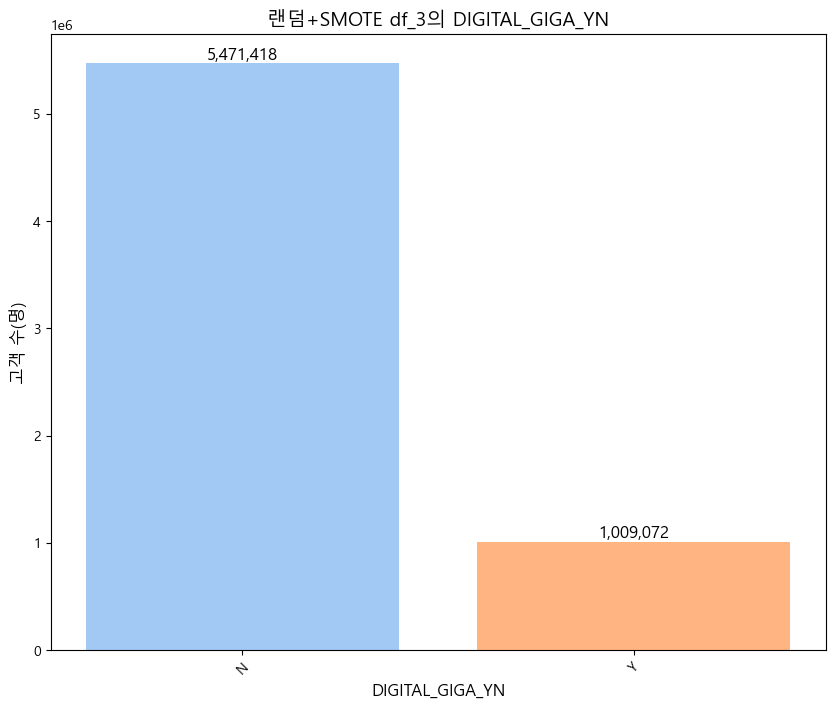

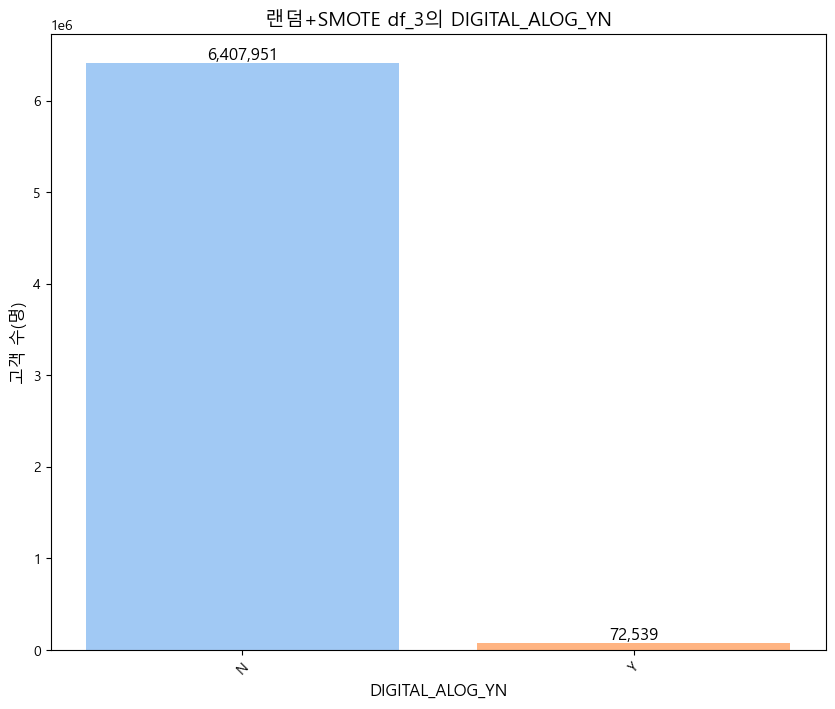

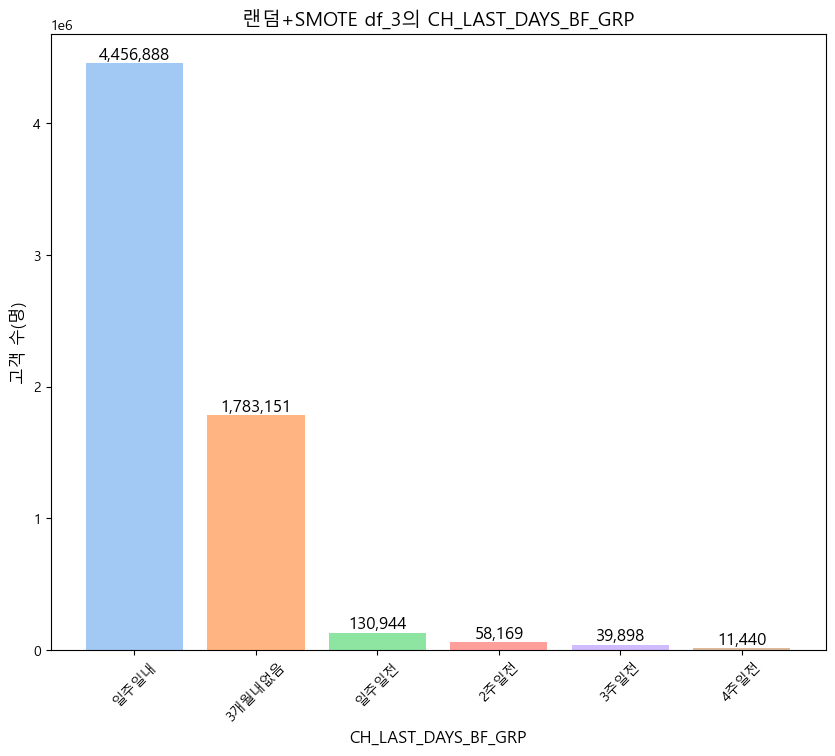

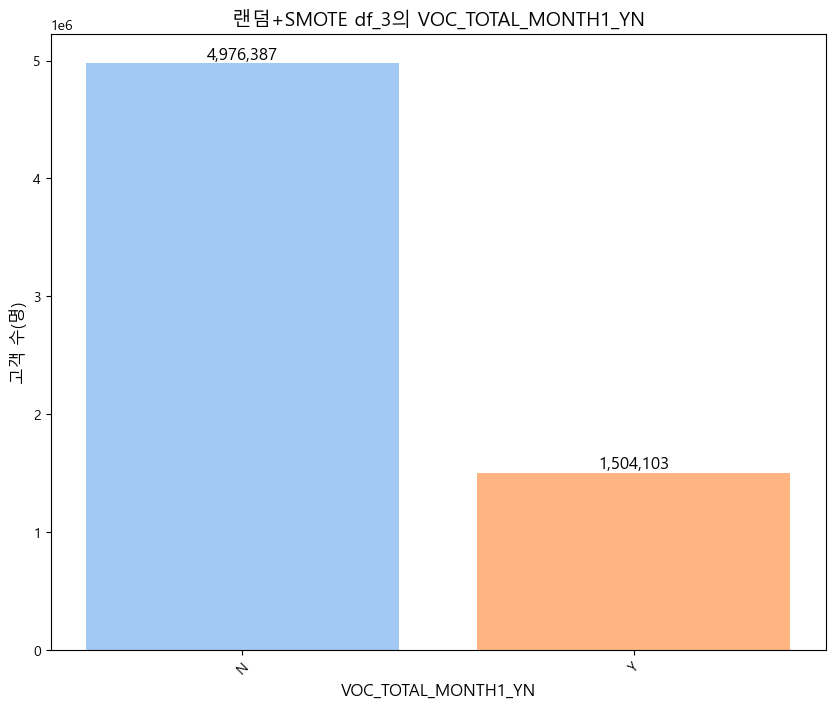

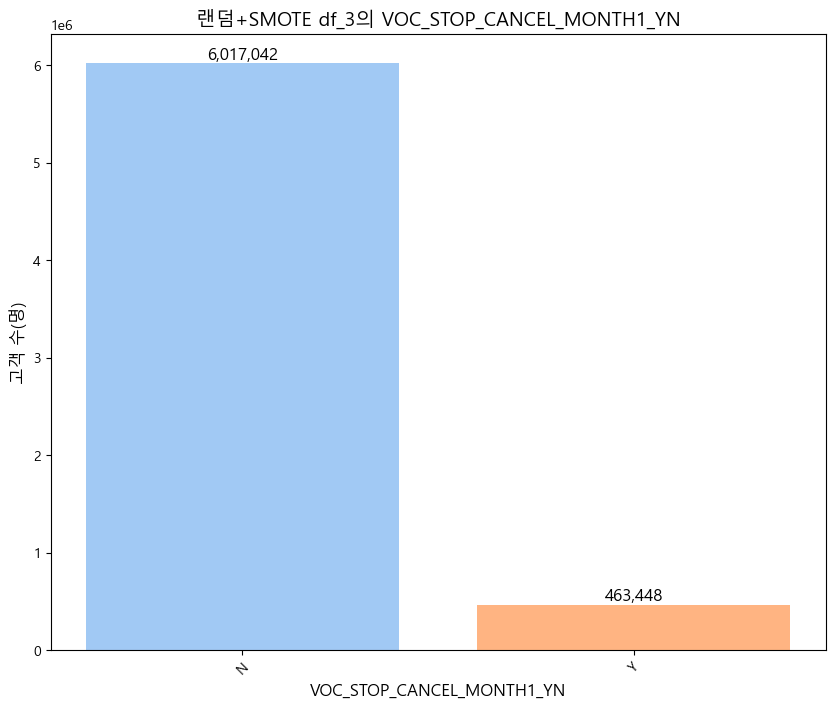

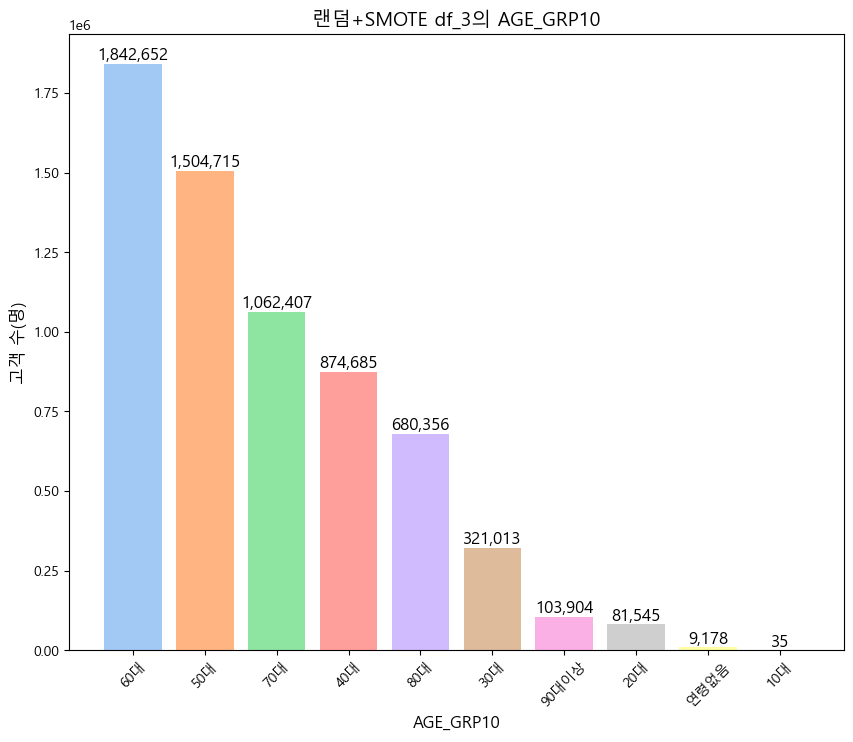

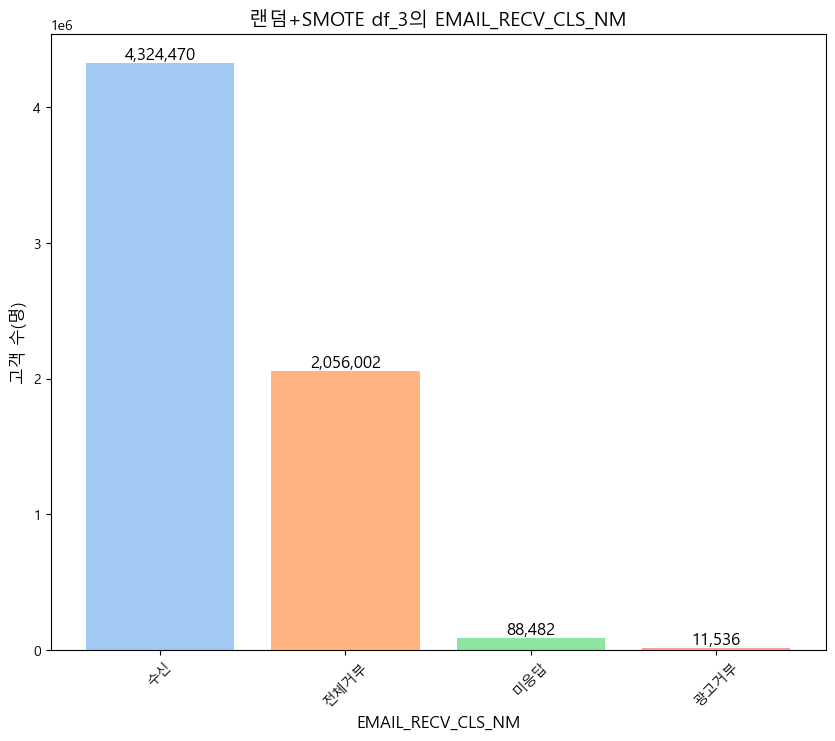

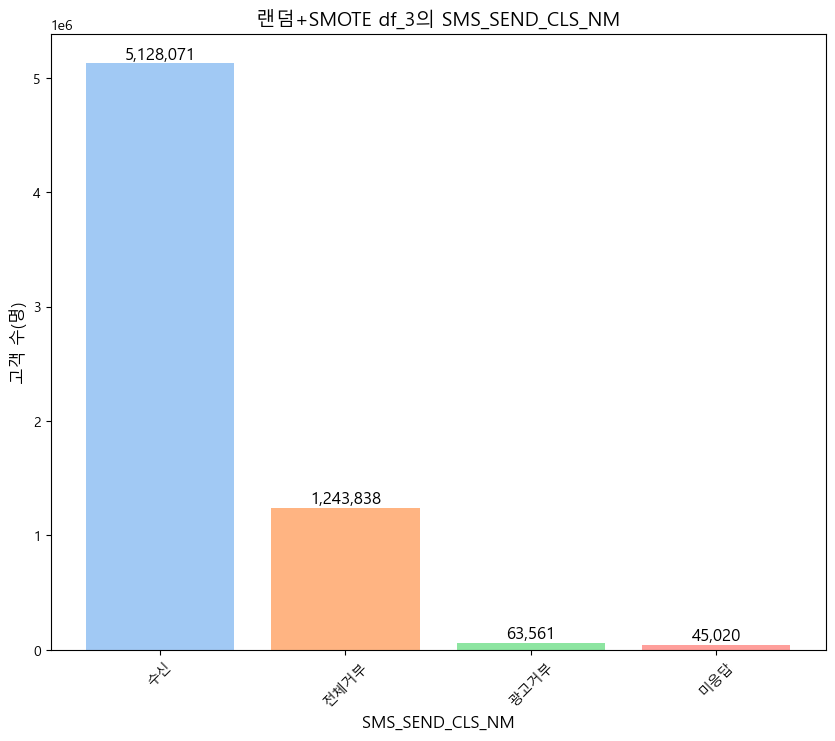

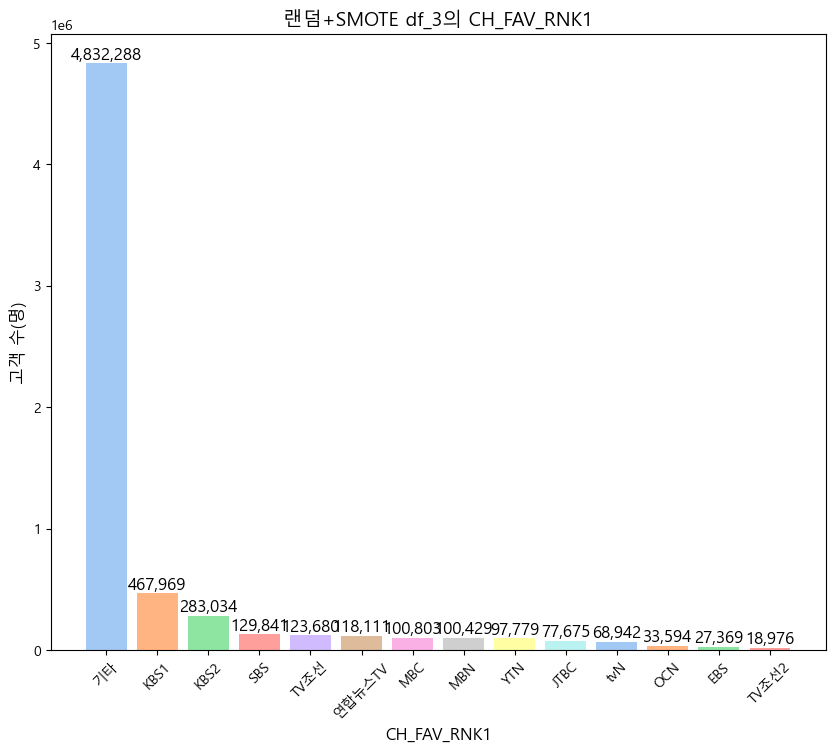

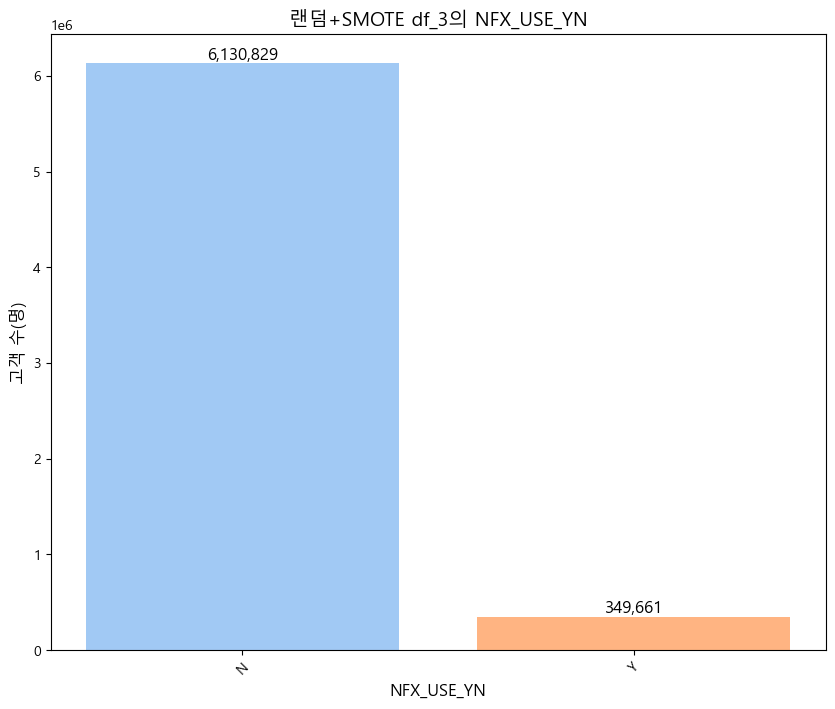

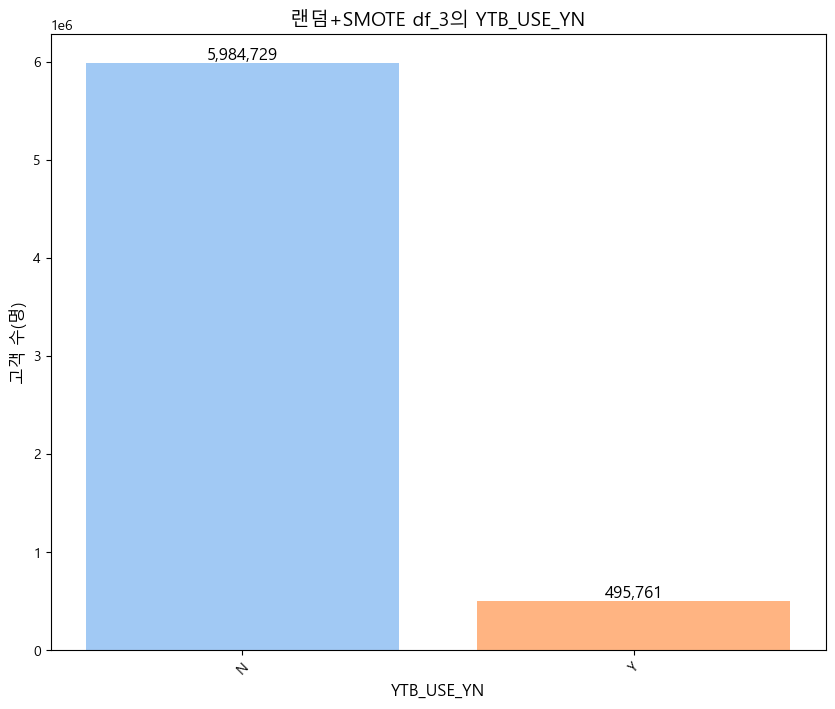

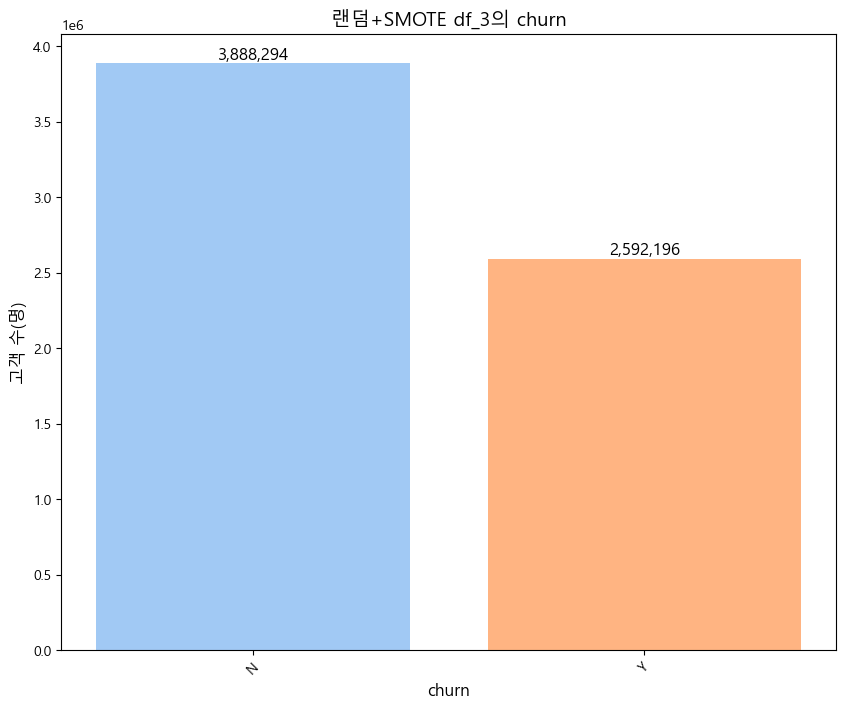

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

object_columns = df_3.select_dtypes(include=['object']).columns
exclude_cols = ['sha2_hash', 'p_mt', 'AGMT_END_YMD']

palette = sns.color_palette("pastel", 10)

for col in object_columns:
    if col not in exclude_cols:
        plt.figure(figsize=(10, 8))
        value_counts = df_3[col].value_counts()

        bars = plt.bar(value_counts.index, value_counts.values, 
                       color=palette[:len(value_counts)])  

        for bar in bars:
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                     f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12)

        plt.xlabel(col, fontsize=12)
        plt.ylabel('고객 수(명)', fontsize=12)
        plt.title(f'랜덤+SMOTE df_3의 {col}', fontsize=14)
        plt.xticks(rotation=45)

        plt.show()


#### df_1 (랜덤언더샘플링) 연속형 변수 확인

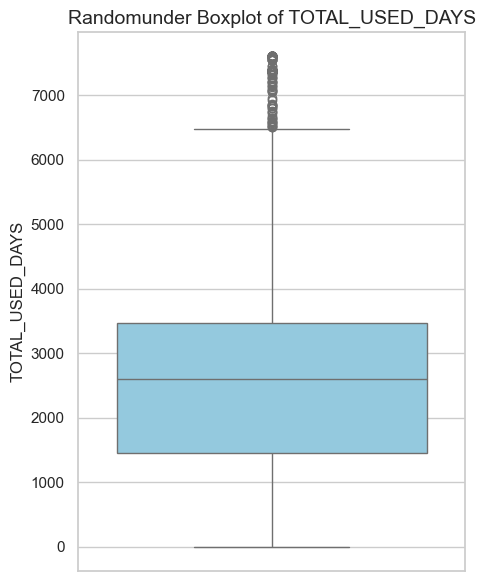

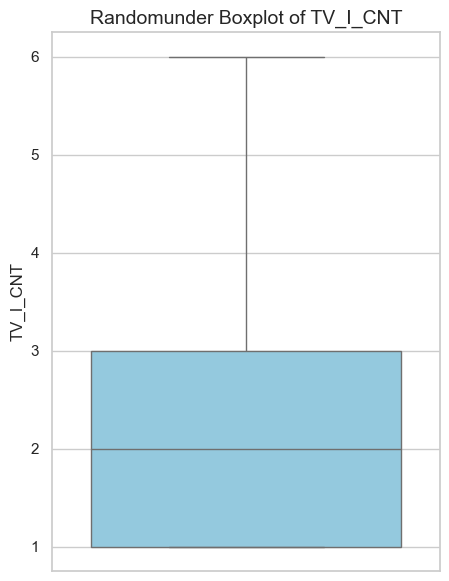

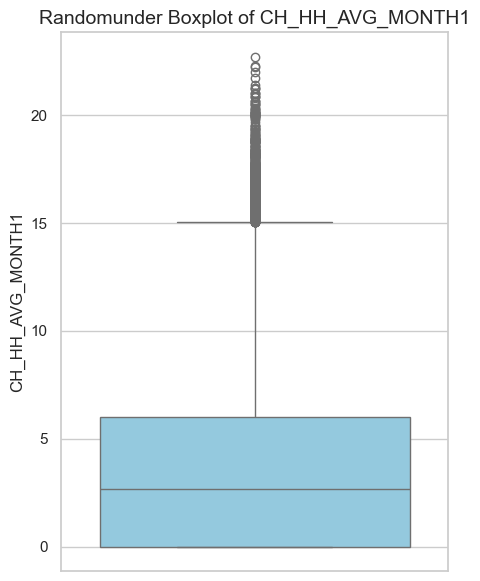

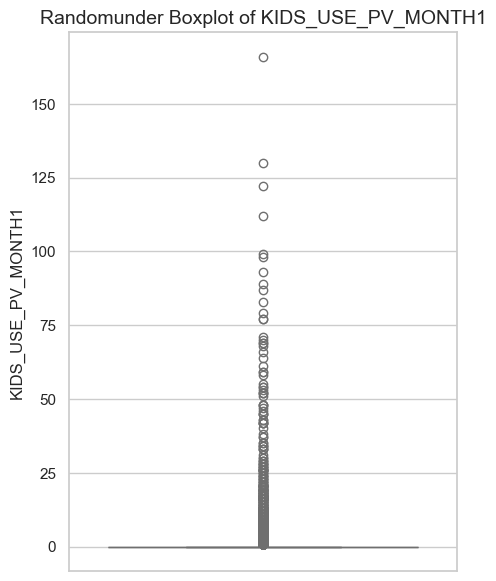

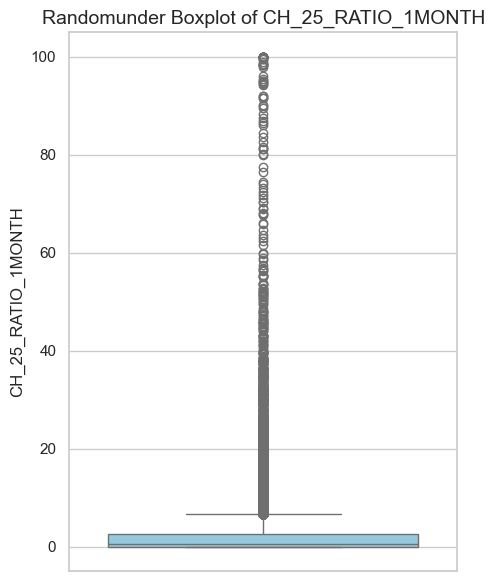

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_1.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_1[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'Randomunder Boxplot of {col}', fontsize=14)

    plt.show()

#### df_2 (SMOTE-NC) 연속형 변수 확인

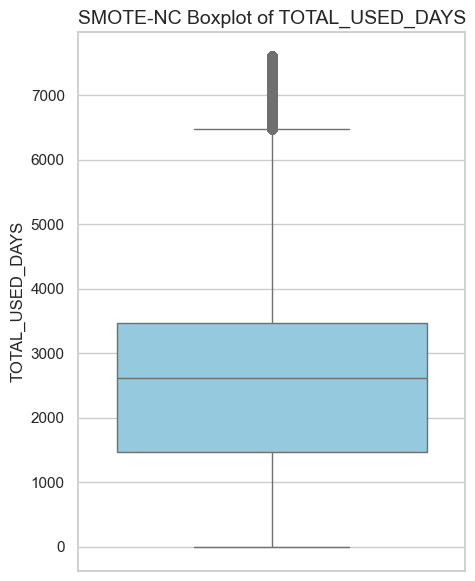

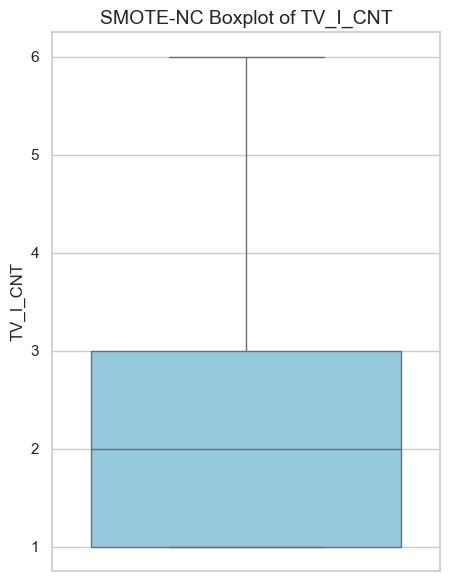

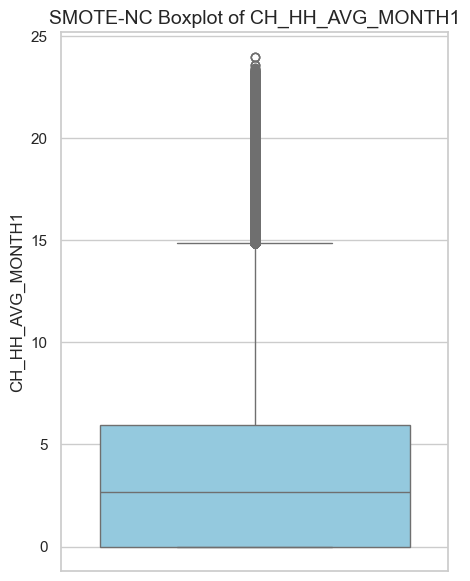

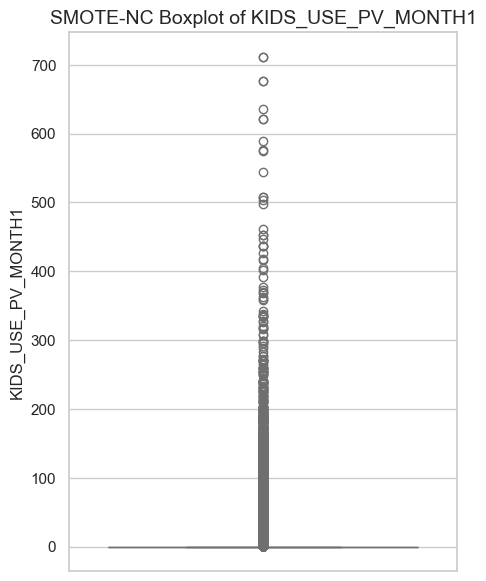

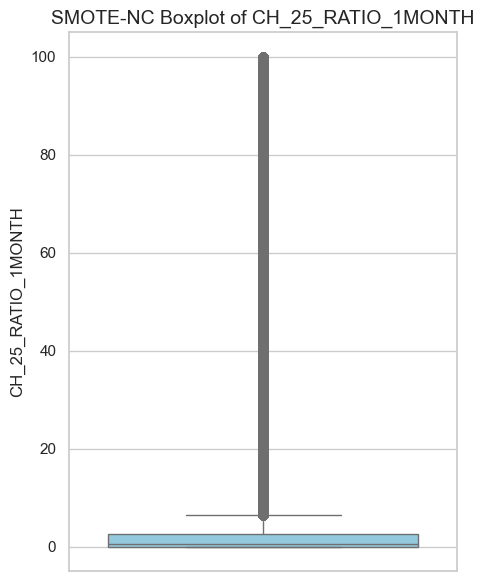

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_2.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_2[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'SMOTE-NC Boxplot of {col}', fontsize=14)

    plt.show()

#### df_3 (SMOTE-NC + 랜덤 언더 샘플링) 연속형 변수 확인

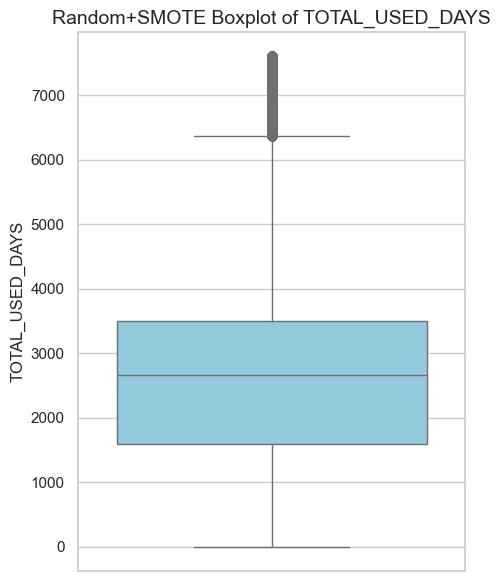

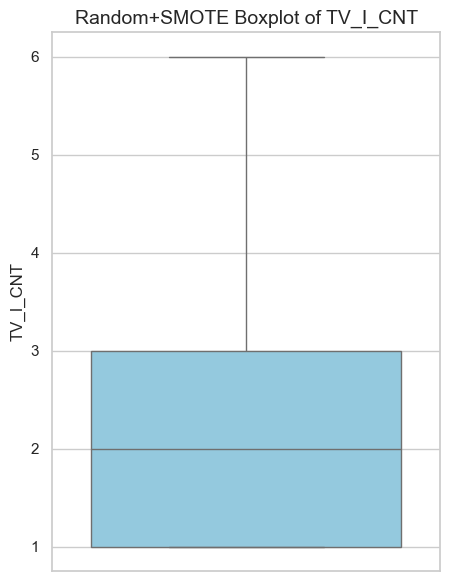

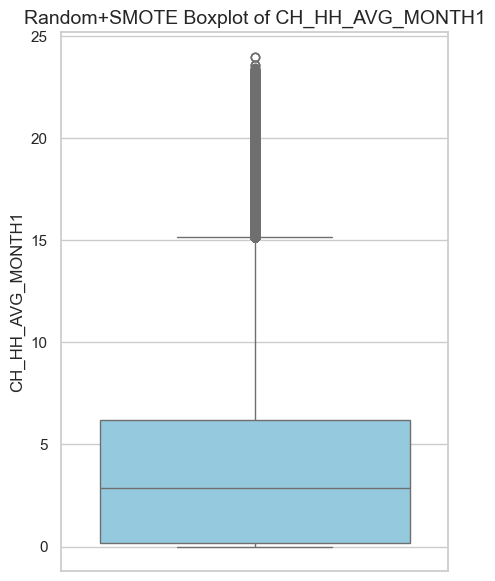

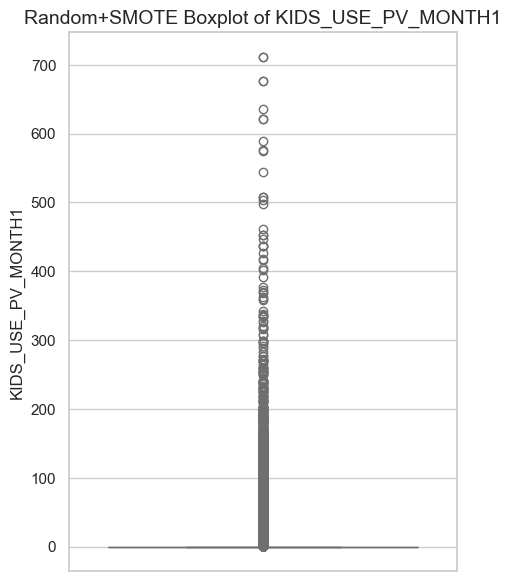

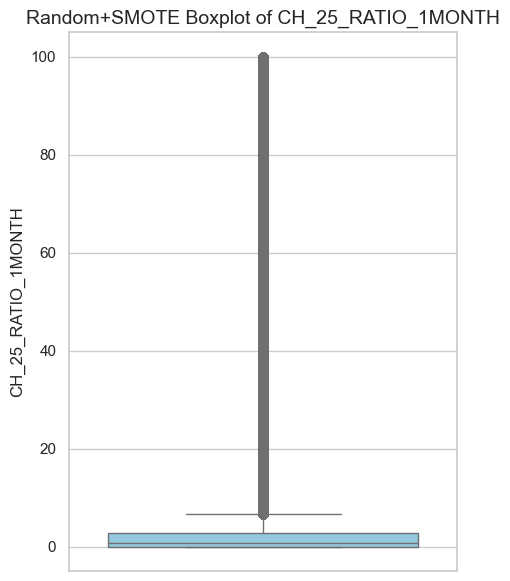

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_3.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'p_mt']

sns.set(style="whitegrid")

for col in numeric_columns:
    plt.figure(figsize=(5, 7))
    sns.boxplot(y=df_3[col], color="skyblue")

    plt.ylabel(col, fontsize=12)
    plt.title(f'Random+SMOTE Boxplot of {col}', fontsize=14)

    plt.show()